In [2]:
%pylab inline
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle
import os
import scipy.optimize
import scipy.constants as sc

In [5]:
print(scipy.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.0.0
0.8.1
2.2.2


# import data and scales

In [6]:
with open('../data/Meffs.pickle', 'rb') as f:
    Meffs = pickle.load(f)

with open('../data/Eeffs.pickle', 'rb') as f:
    Eeffs = pickle.load(f)

with open('../data/dEeffs.pickle', 'rb') as f:
    dEeffs = pickle.load(f)
    
with open('../data/dE_fits.pickle', 'rb') as f:
    dE_fits = pickle.load(f)


In [7]:
hbarc = sc.hbar * sc.speed_of_light / sc.electron_volt / sc.femto / sc.mega # 197 MeV fm

In [8]:
ainv = 2.194e3 # lattice cutoff [MeV]
lat_unit = hbarc / ainv # lattice spacing [fm]

# previous work

Ref. Yamazaki, Kuramashi, Ukawa, "Helium nuclei, deuteron and dineutron in 2+1 flavor lattice QCD", Physical Review D.86 (2012) 074514, arXiv:1207.4277 [hep-lat].

In [9]:
prev_dE_fits = {
    'helium': {32: [10, 14, -47, 24],
               40: [ 9, 13, -30, 15],
               48: [10, 14, -39, 20],
               64: [10, 14, -46, 11]},
    'triton': {32: [10, 14, -23.2, 7.6],
               40: [ 9, 14, -20.2, 6.9],
               48: [10, 14, -25.5, 5.3],
               64: [ 9, 14, -19.5, 3.7]},
    'NN3S1': {32: [ 9, 14, -12.4, 2.1],
            40: [10, 15, -12.2, 1.9],
            48: [10, 14, -11.1, 1.7],
            64: [ 9, 14, -11.7, 1.2]},
    'NN1S0': {32: [10, 14, -6.2, 2.4],
            40: [11, 15, -8.2, 4.0],
            48: [10, 14, -7.3, 1.7],
            64: [10, 14, -7.2, 1.4]}
}

# plot effective energy shifts

In [17]:
def plot_dEeffs(L=48, rela='rela', ch='triton', spin='', yr=(-75, 5), figs_dir='../figs/effective_energy_shifts'):
    ch_label = {'triton': '3He', 'helium': '4He', 'NN': r'NN', 'XiXi': r'\Xi\Xi'}[ch]
    ch_label_2 = {'triton': '3He', 'helium': '4He',
                 'NN1S0': r'$NN$($^1$S$_0$)', 'NN3S1': r'$NN$($^3$S$_1$)',
                 'XiXi1S0': r'$\Xi\Xi$($^1$S$_0$)', 'XiXi3S1': r'$\Xi\Xi$($^3$S$_1$)'}[ch+spin]

    fig, ax = plt.subplots()
    for src, col, fmt, dx in zip(['smeared', 'wall'], ['blue', 'red'], ['s', 'o'], [-0.05, 0.05]):
        if spin in ['1S0', '3S1']:
            dat = dEeffs[(L, src, rela, ch, spin)]
        else:
            dat = dEeffs[(L, src, rela, ch)]
            
        if rela == 'rela':
            mfc = col
        else:
            mfc = 'none'

        ax.errorbar(dat[:,0] + dx, dat[:,3]*ainv, dat[:,4]*ainv, fmt=fmt,
                    capsize=10, capthick=2.0, ms=20, color=col, mfc=mfc, mew=2.0,
                   label=r'{} src. {} {}'.format(src, rela, ch_label_2))

    ax.set_xlim(-0.5, 23.5)
    ax.axhline(0, color='black')
        
    if rela == 'NR' and ch in ['triton', 'helium', 'NN']:
        fit_min, fit_max, fit_val, fit_err = prev_dE_fits[ch+spin][L]
        xls = np.linspace(fit_min-0.2, fit_max+0.2)
        ax.plot(xls, np.ones_like(xls) * fit_val, color='black', lw=5, zorder=5, label='Yamazaki et al. (2012)')
        ax.plot(xls, np.ones_like(xls) * (fit_val + fit_err), color='black', lw=2, zorder=5)
        ax.plot(xls, np.ones_like(xls) * (fit_val - fit_err), color='black', lw=2, zorder=5)

    ax.set_ylim(yr)
    leg = ax.legend(frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    leg.get_frame().set_alpha(0.8)
    ax.set_xlabel(r'$t$ [$a$]', size=48)
    ax.set_ylabel(r'$\Delta E^\mathrm{{eff}}_\mathrm{{{}}}(t)$ [MeV] $L = {}$'.format(ch_label, L), size=48)
    
    if not os.path.exists(figs_dir):
        os.makedirs(figs_dir)
        
    fname = f'{figs_dir}/dEeff_{ch + spin}_L{L}_{rela}.pdf'
    fig.savefig(fname, bbox_inches='tight')

#plot_dEeffs(ch='XiXi', rela='NR', spin='1S0', yr=(-16, 16))

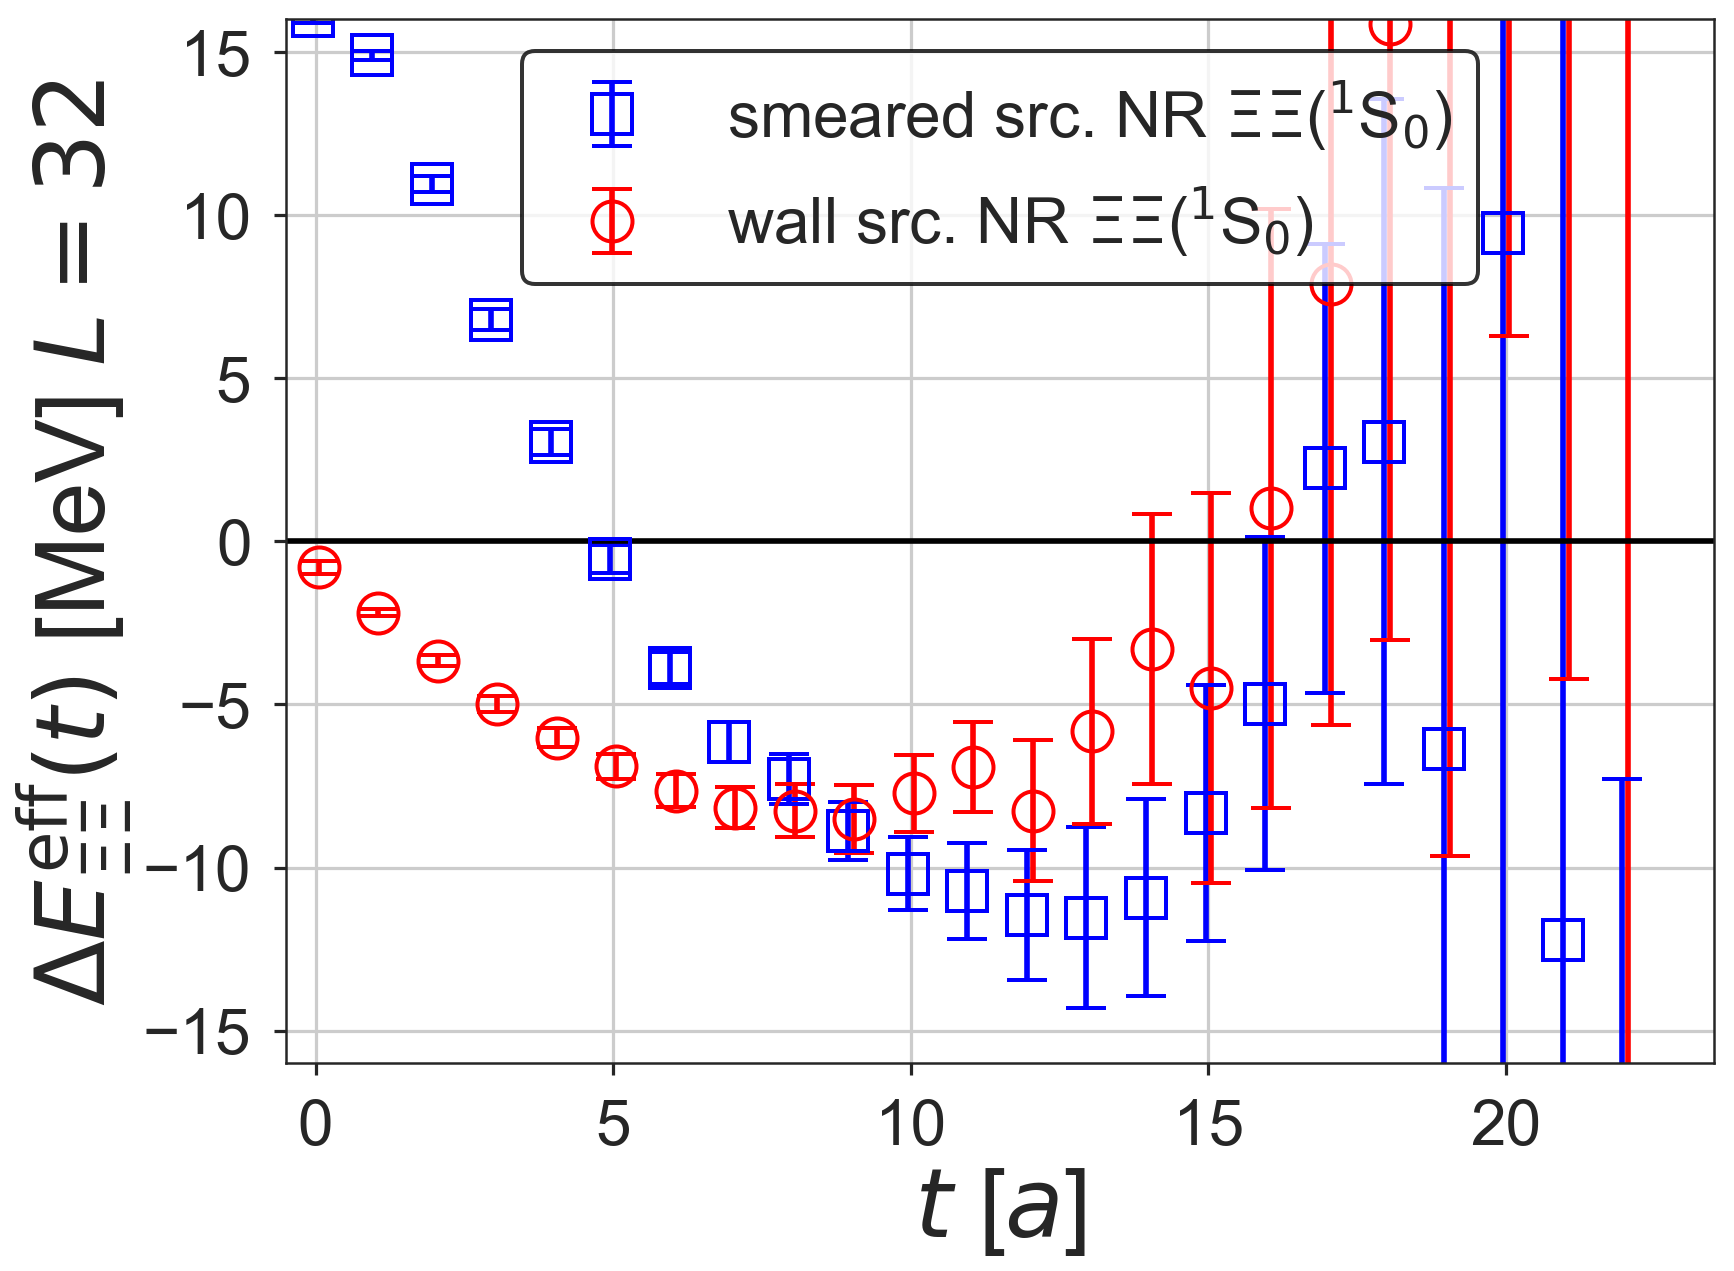

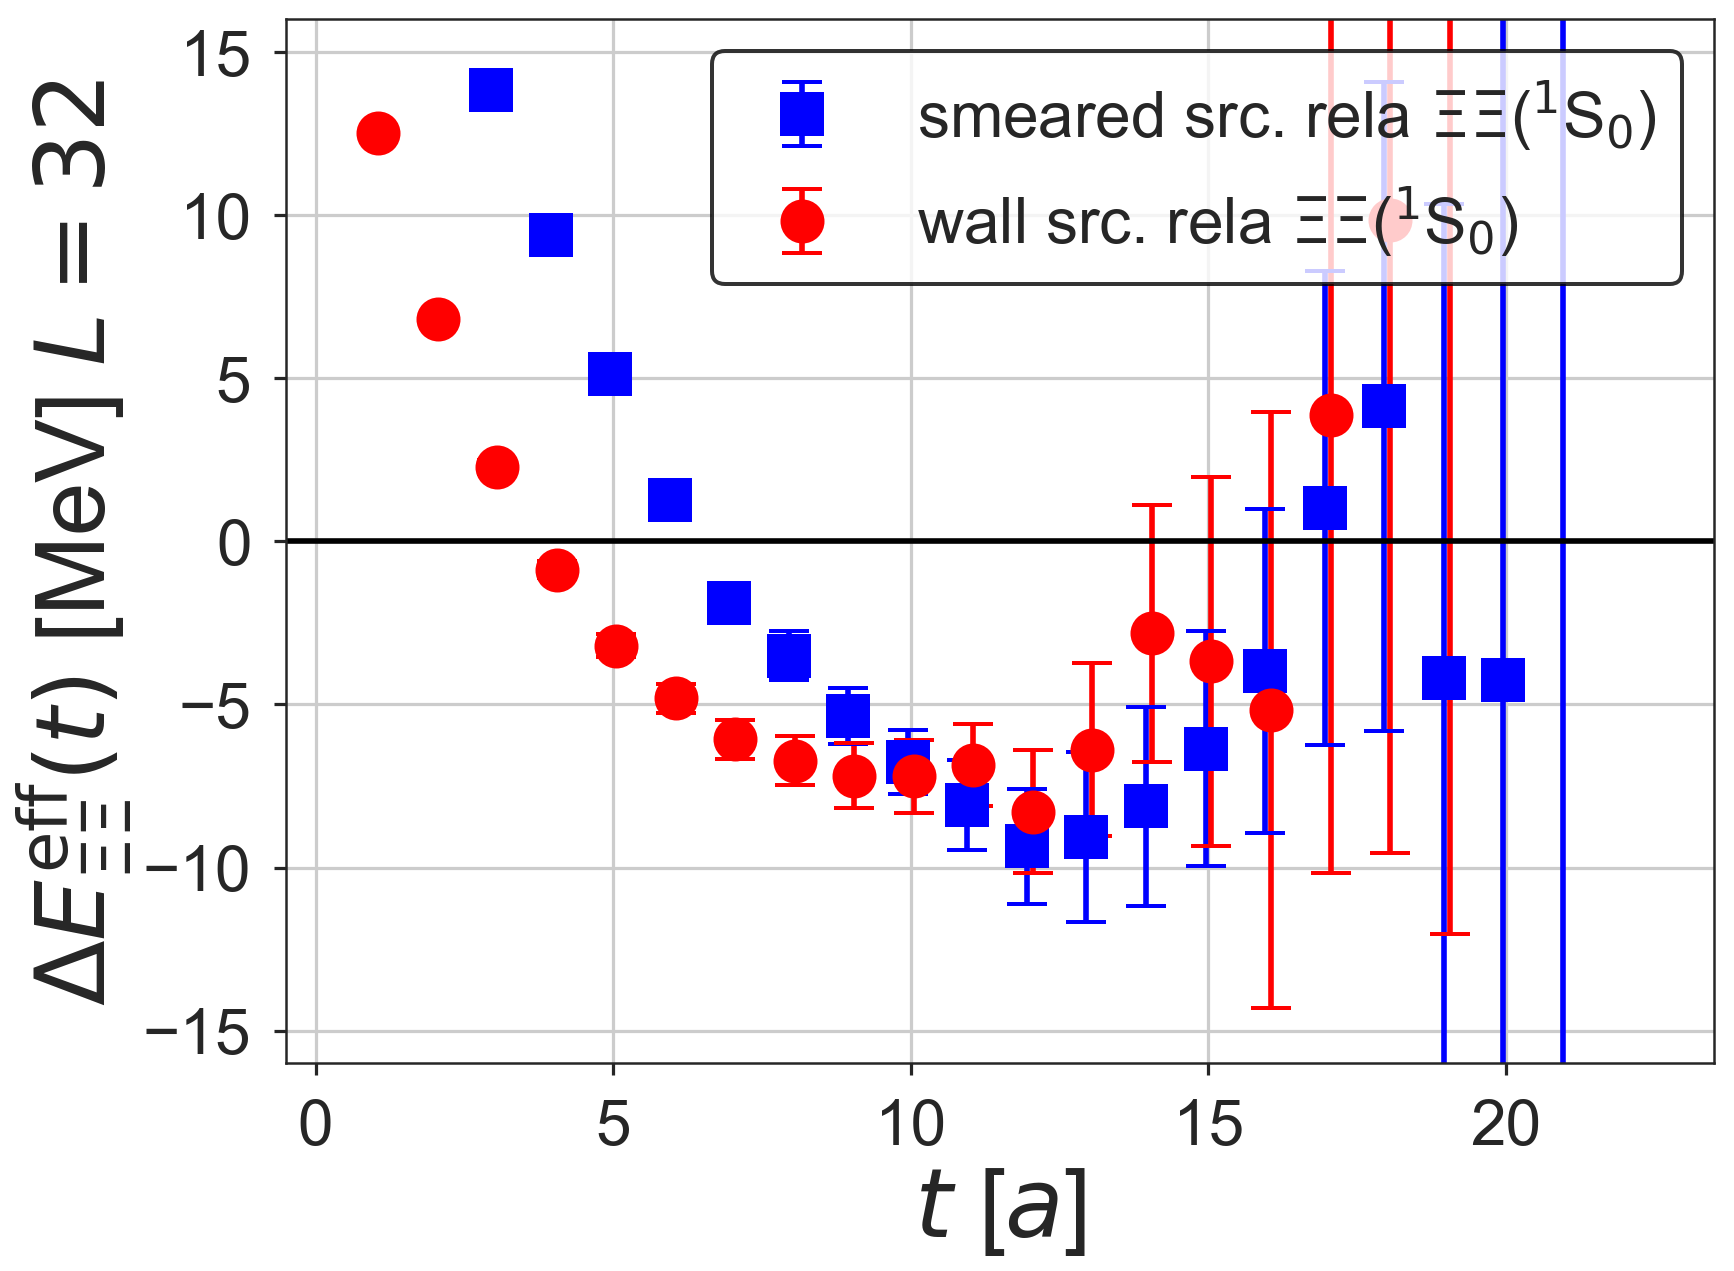

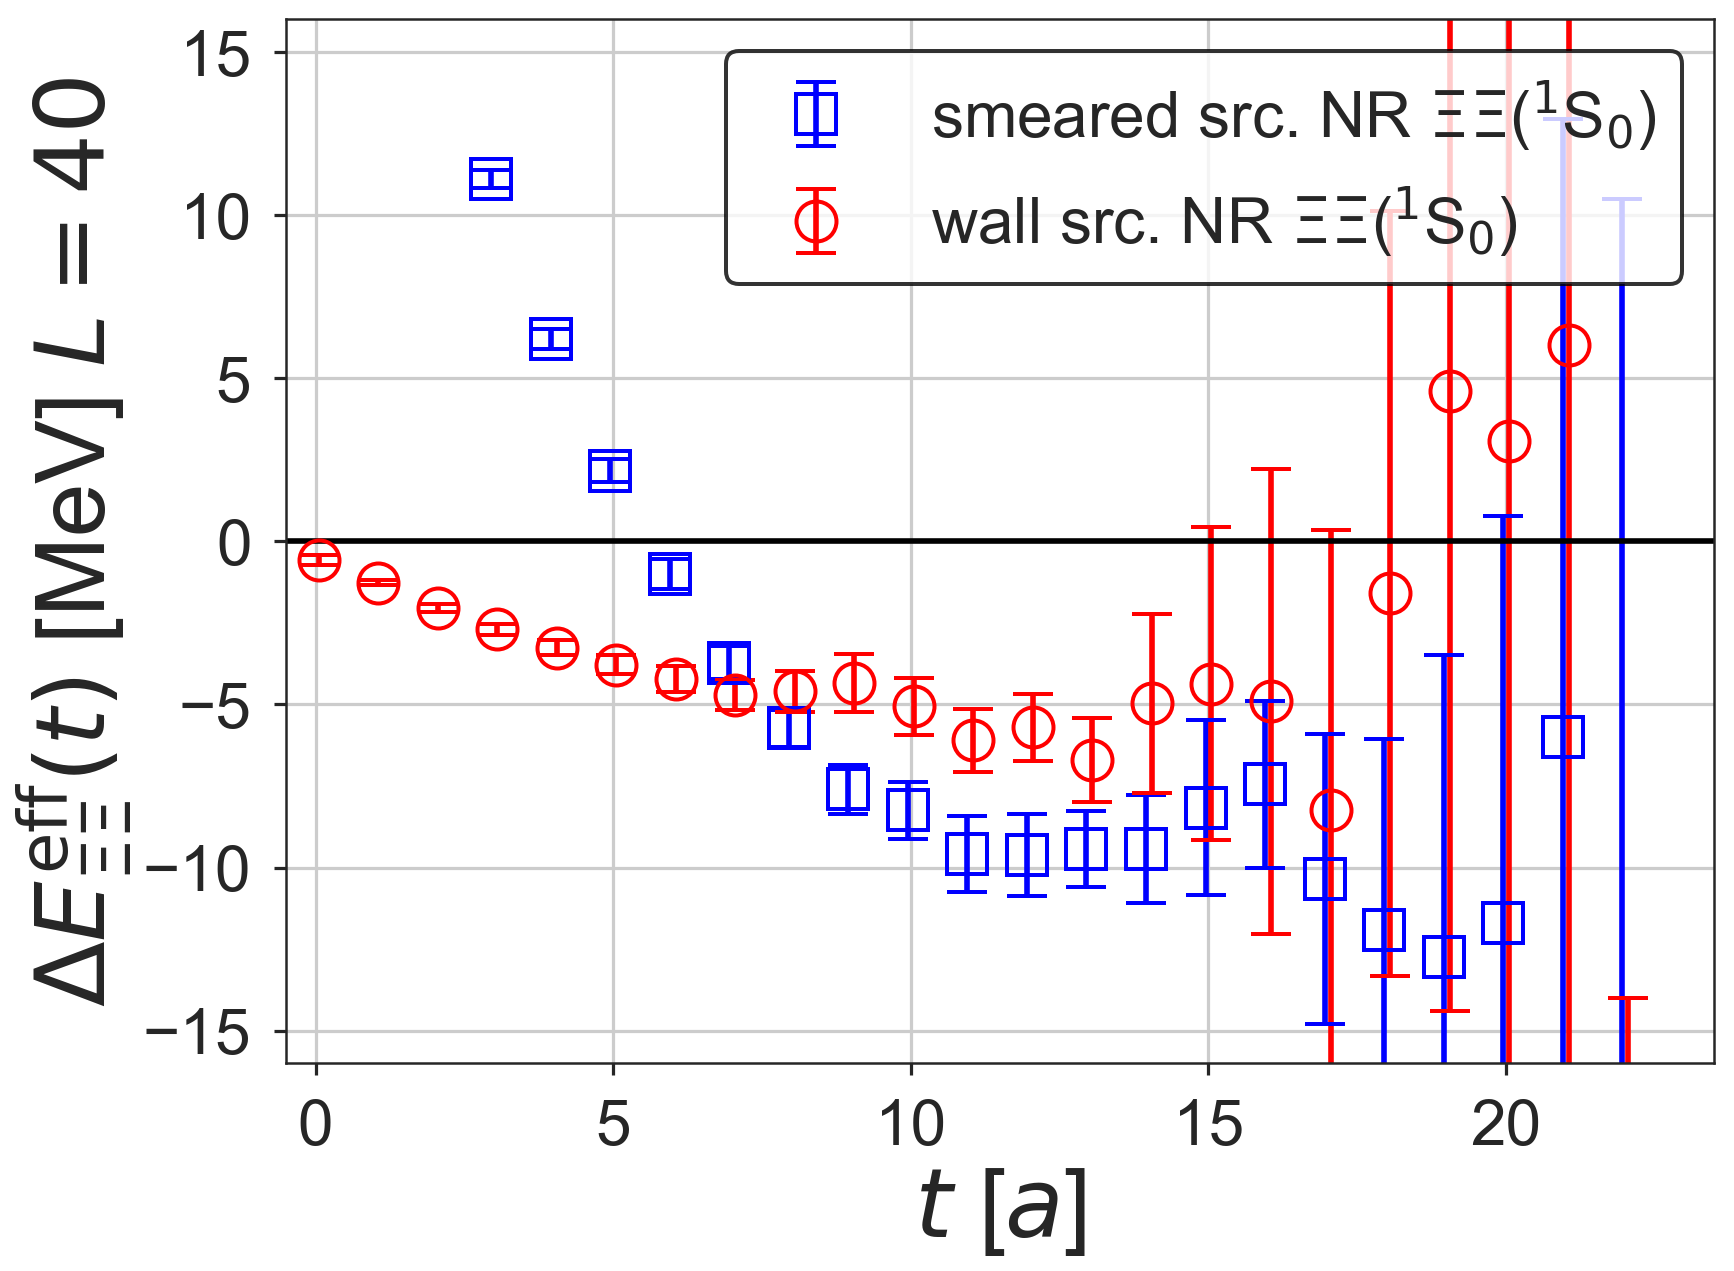

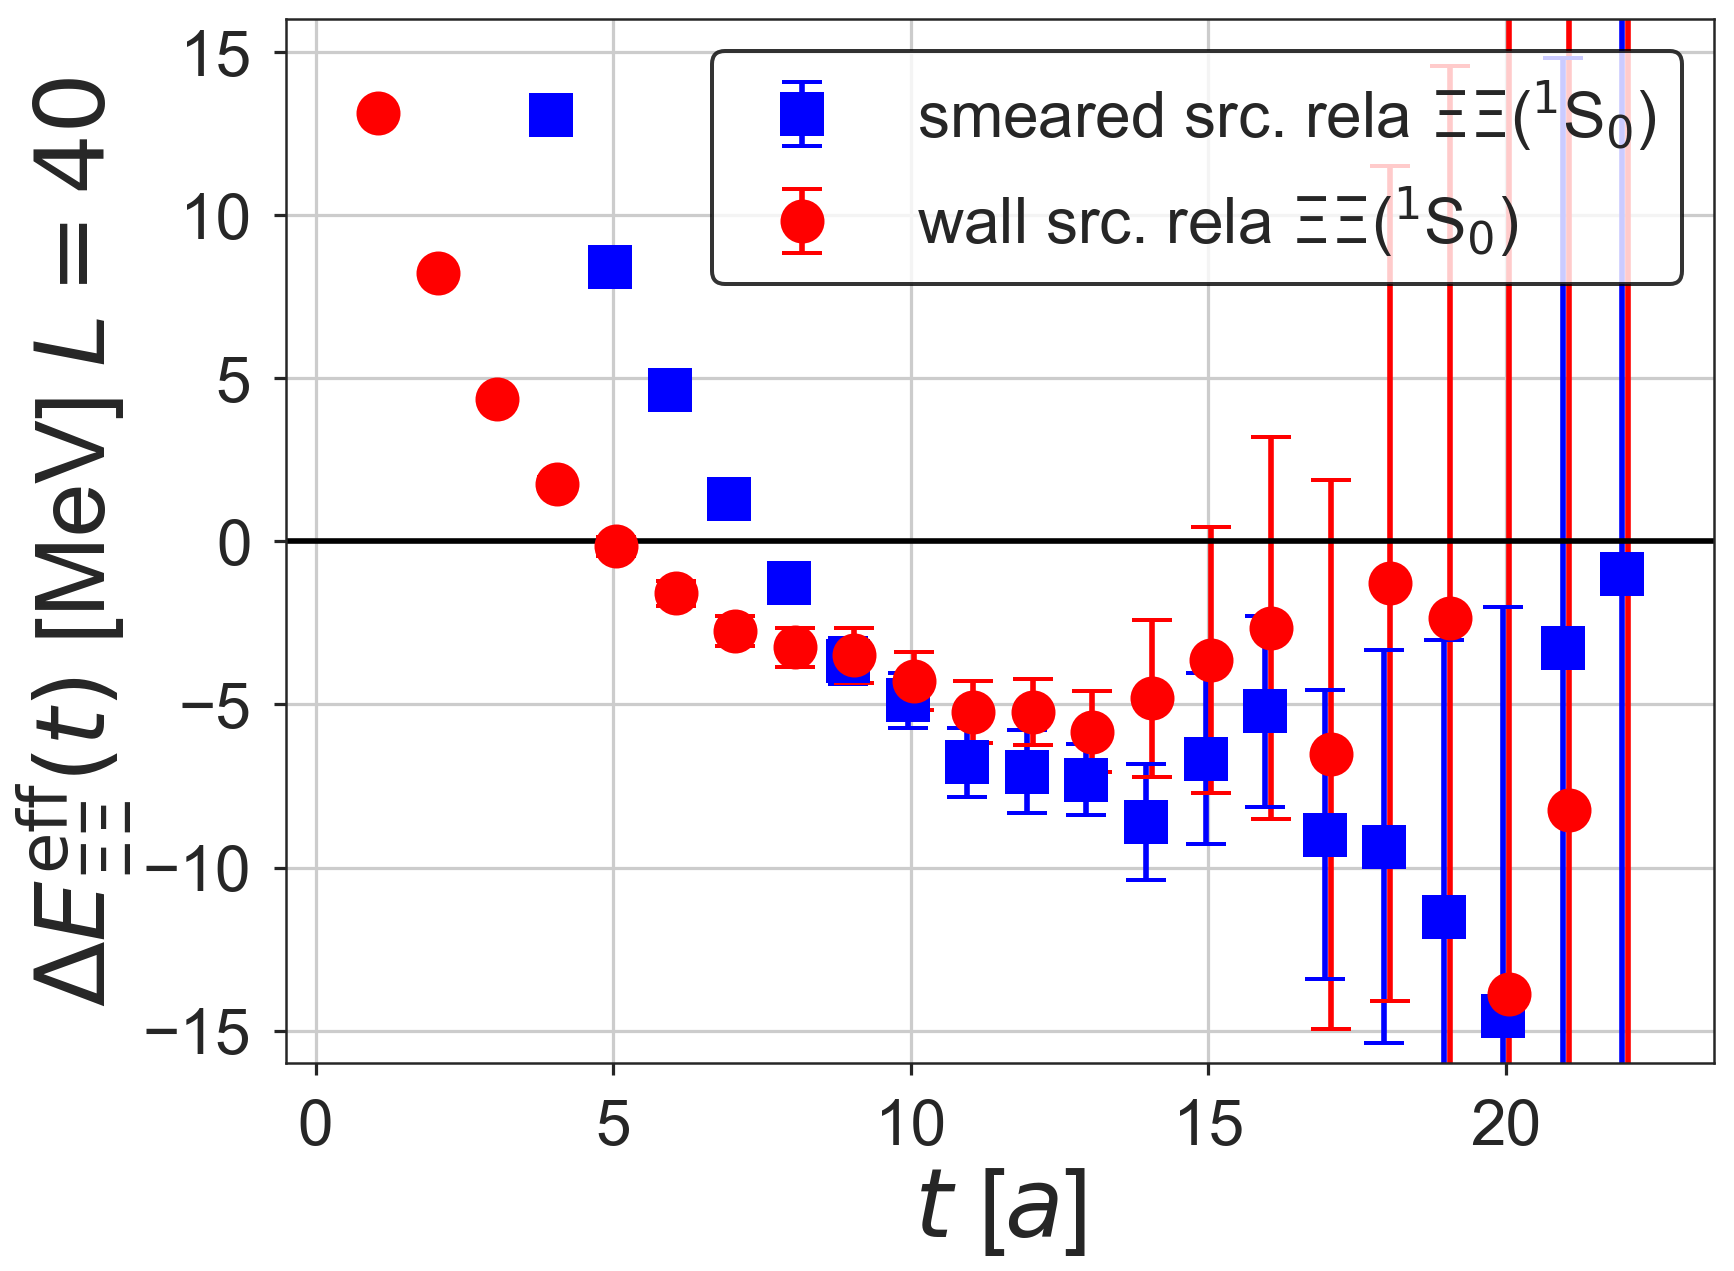

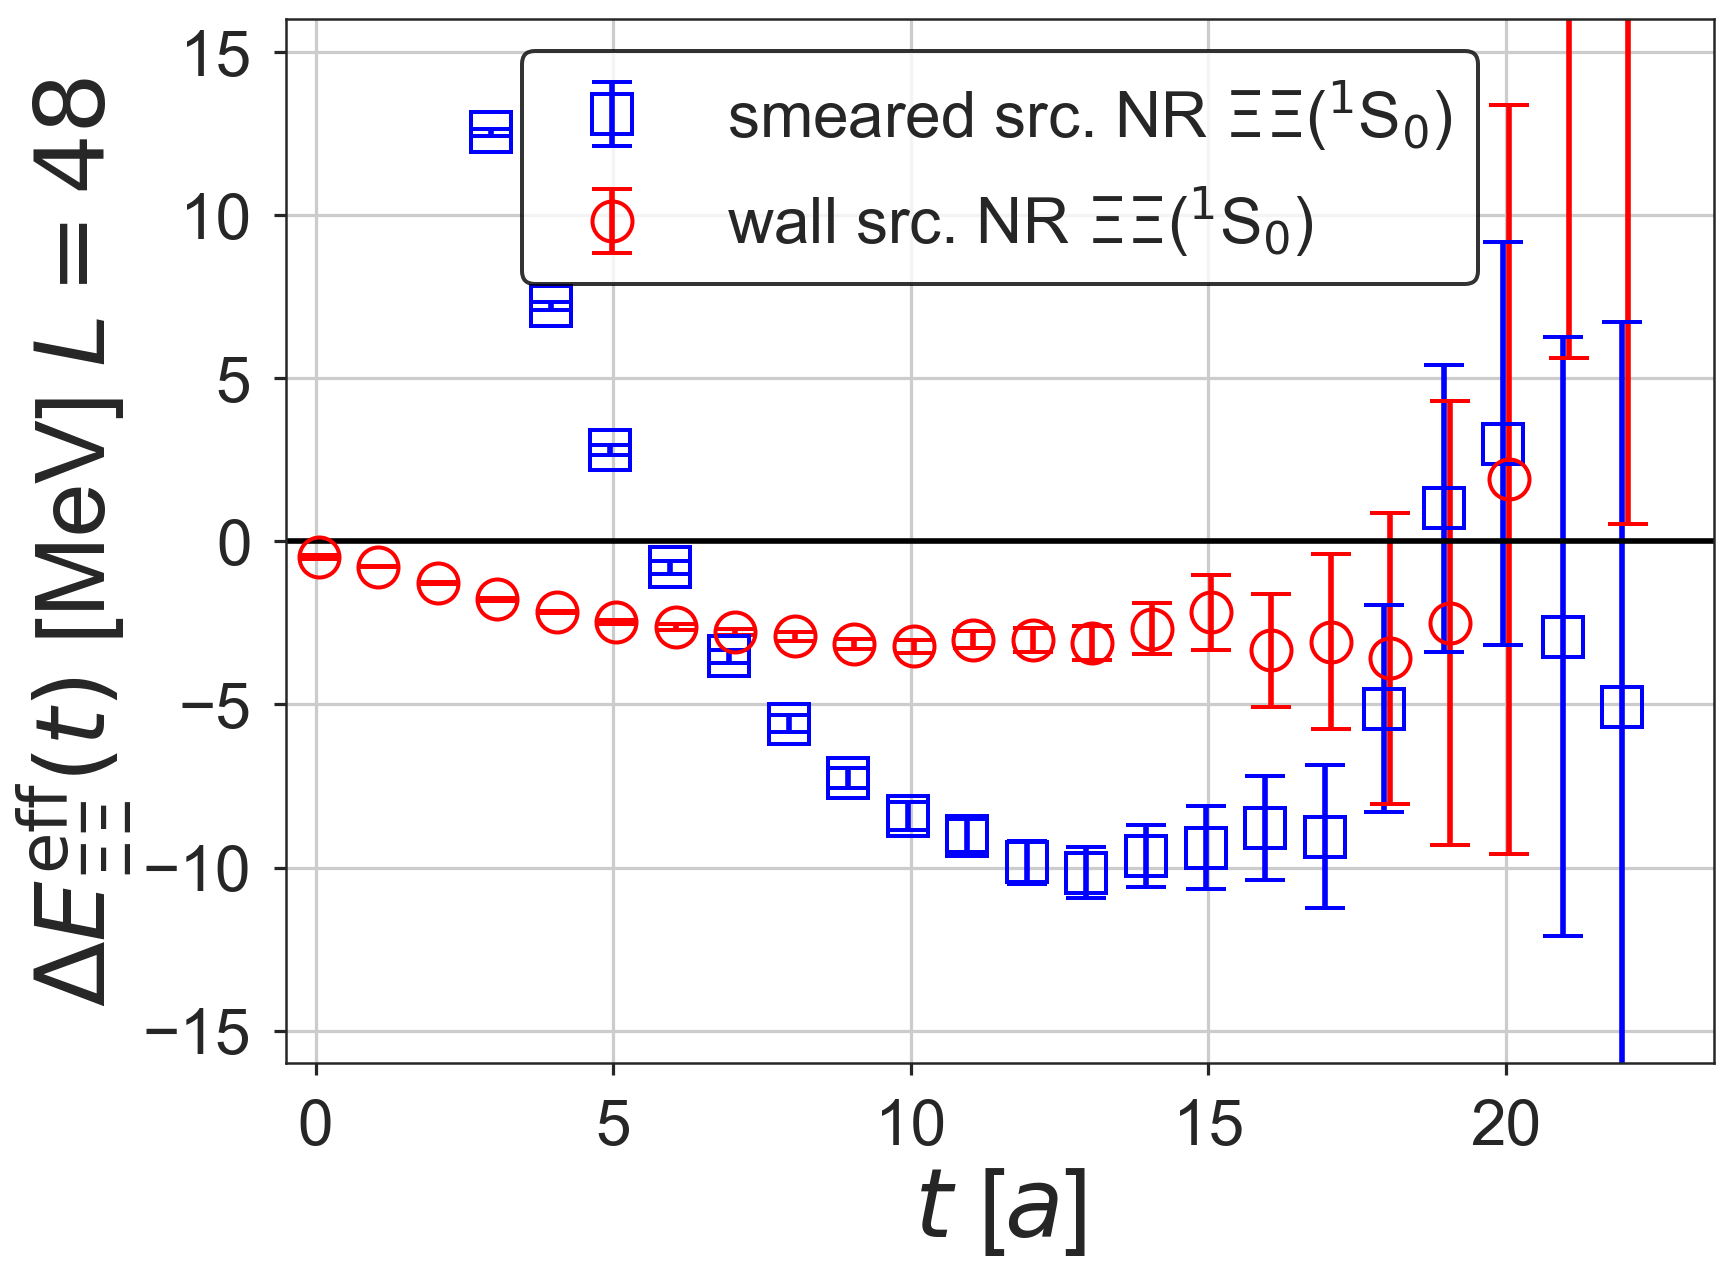

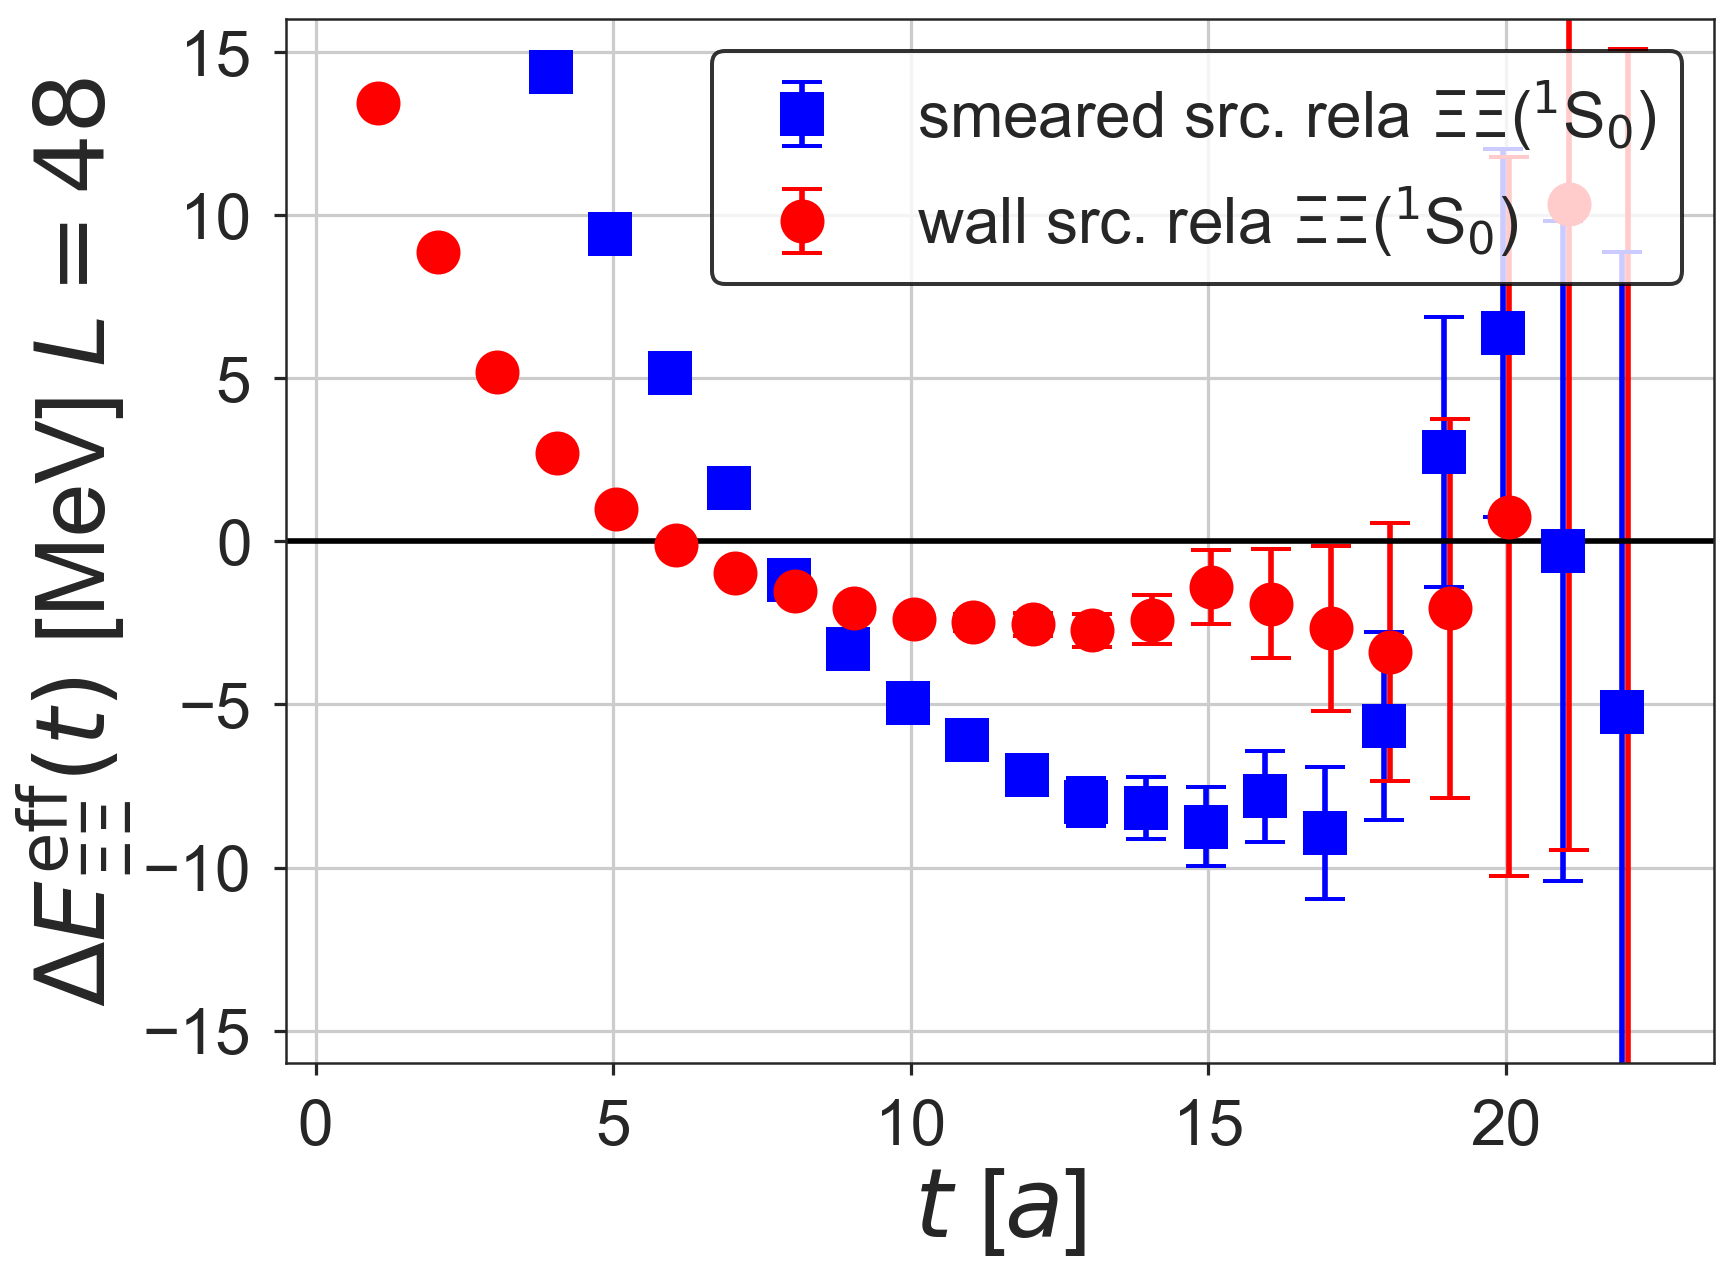

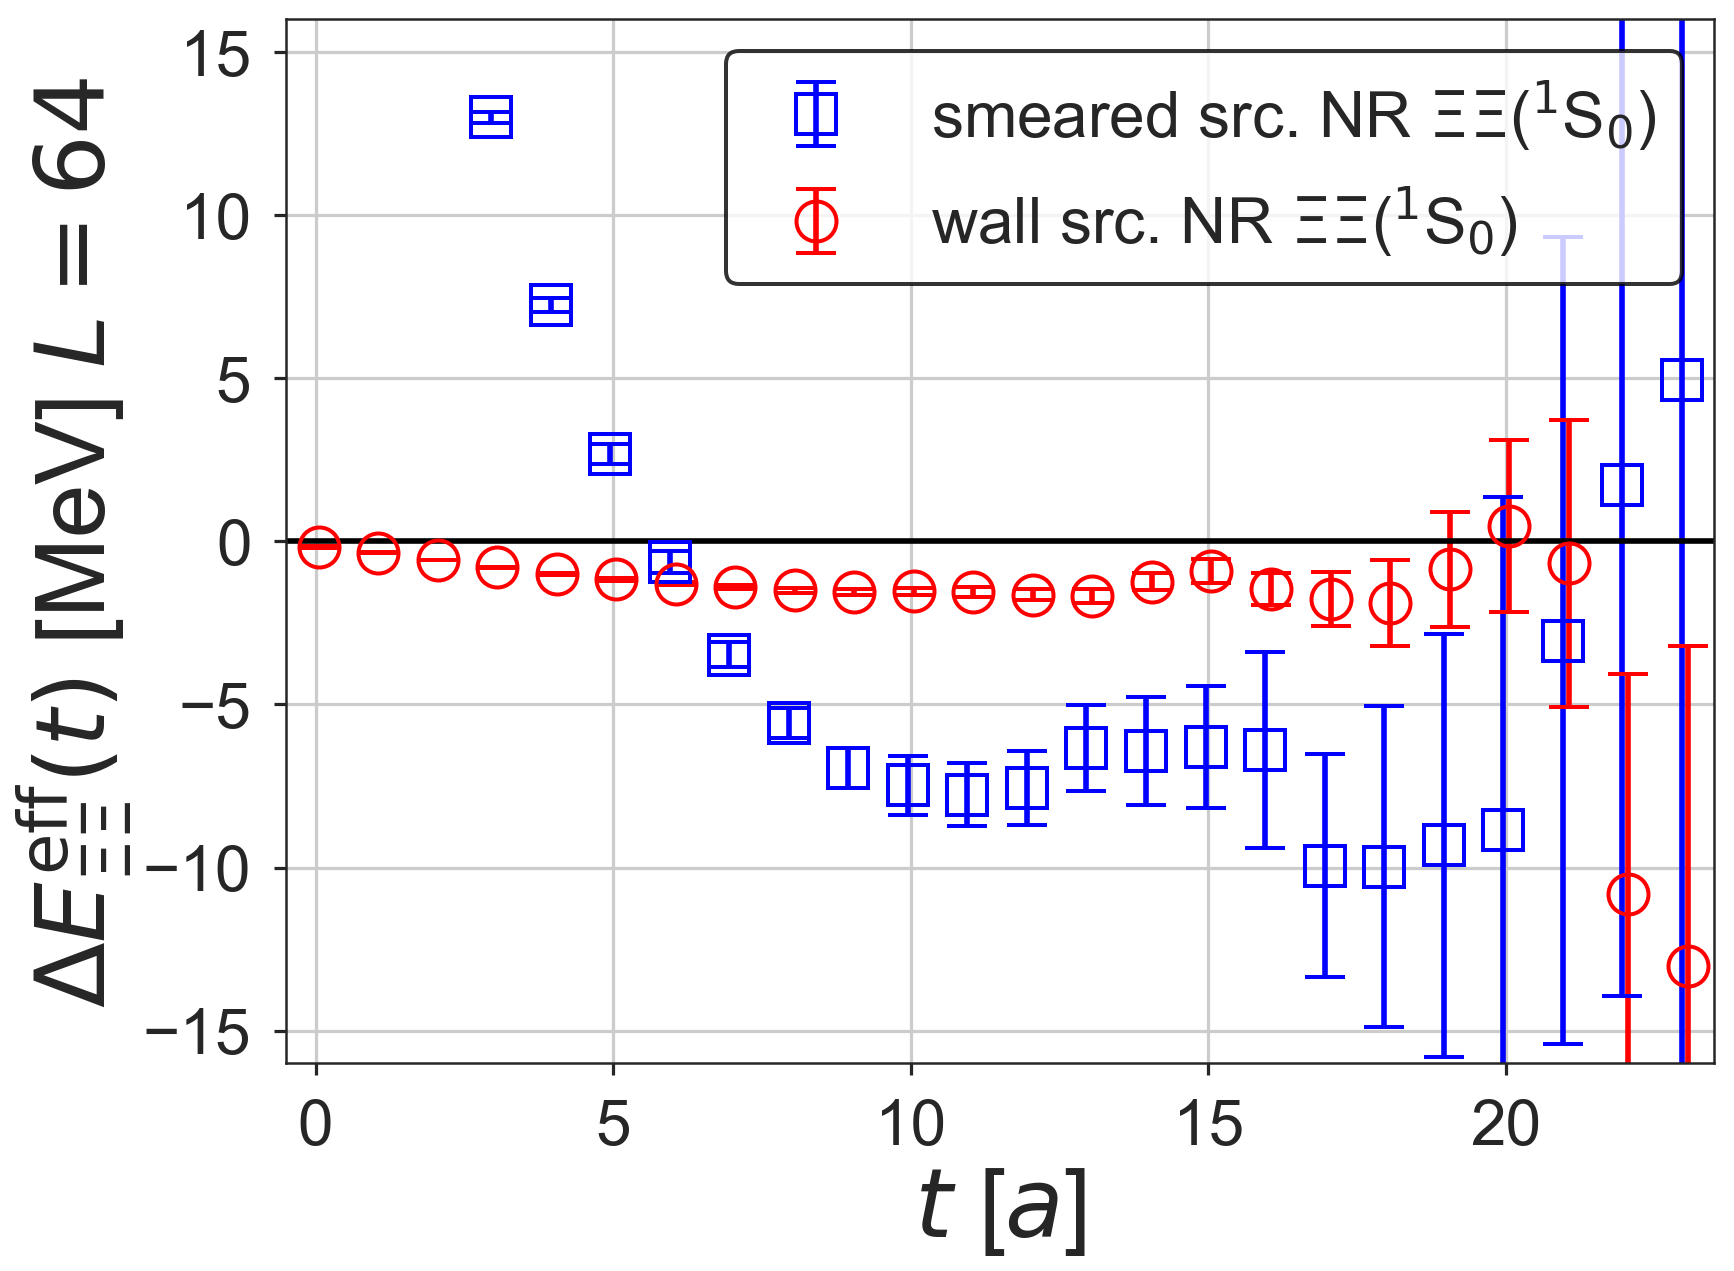

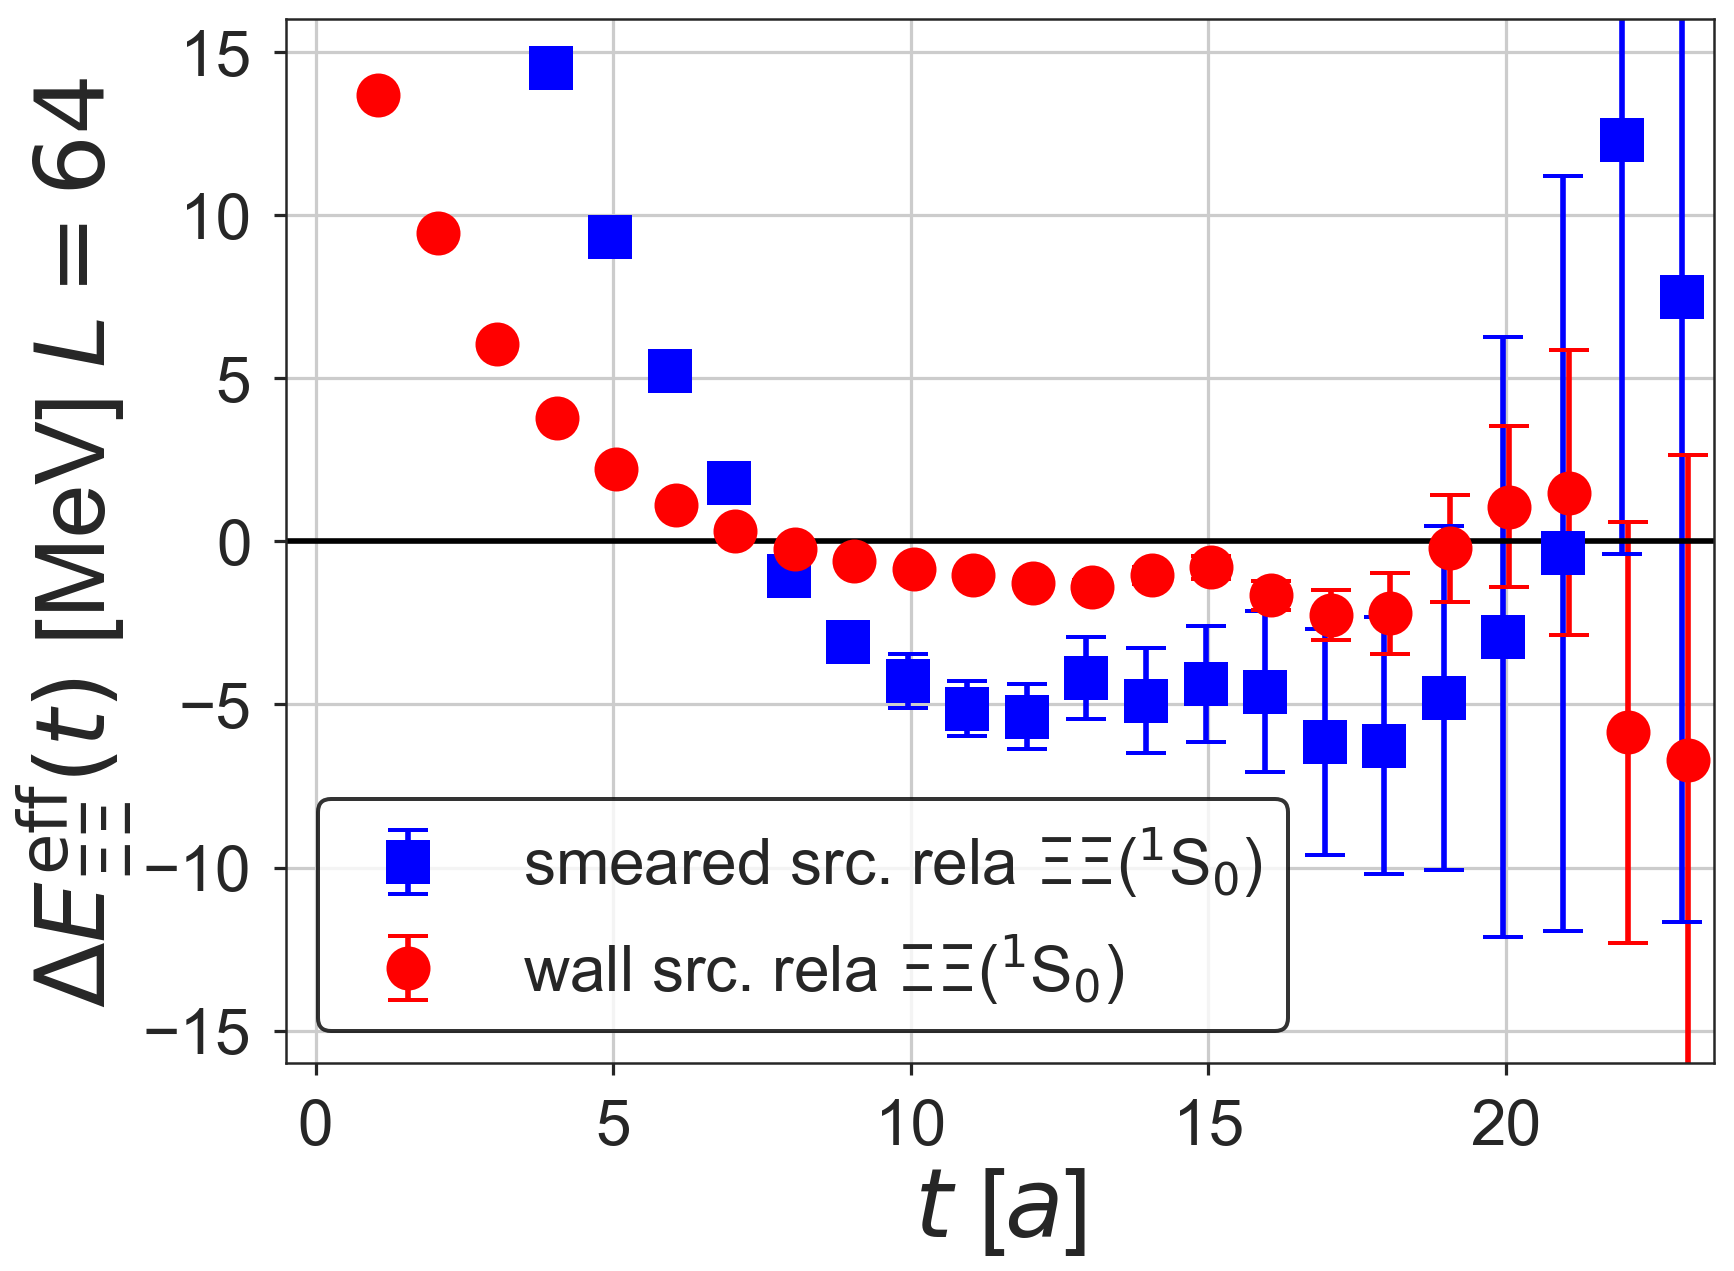

In [18]:
ch = 'XiXi'
spin = '1S0'
yr = (-16, 16)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)

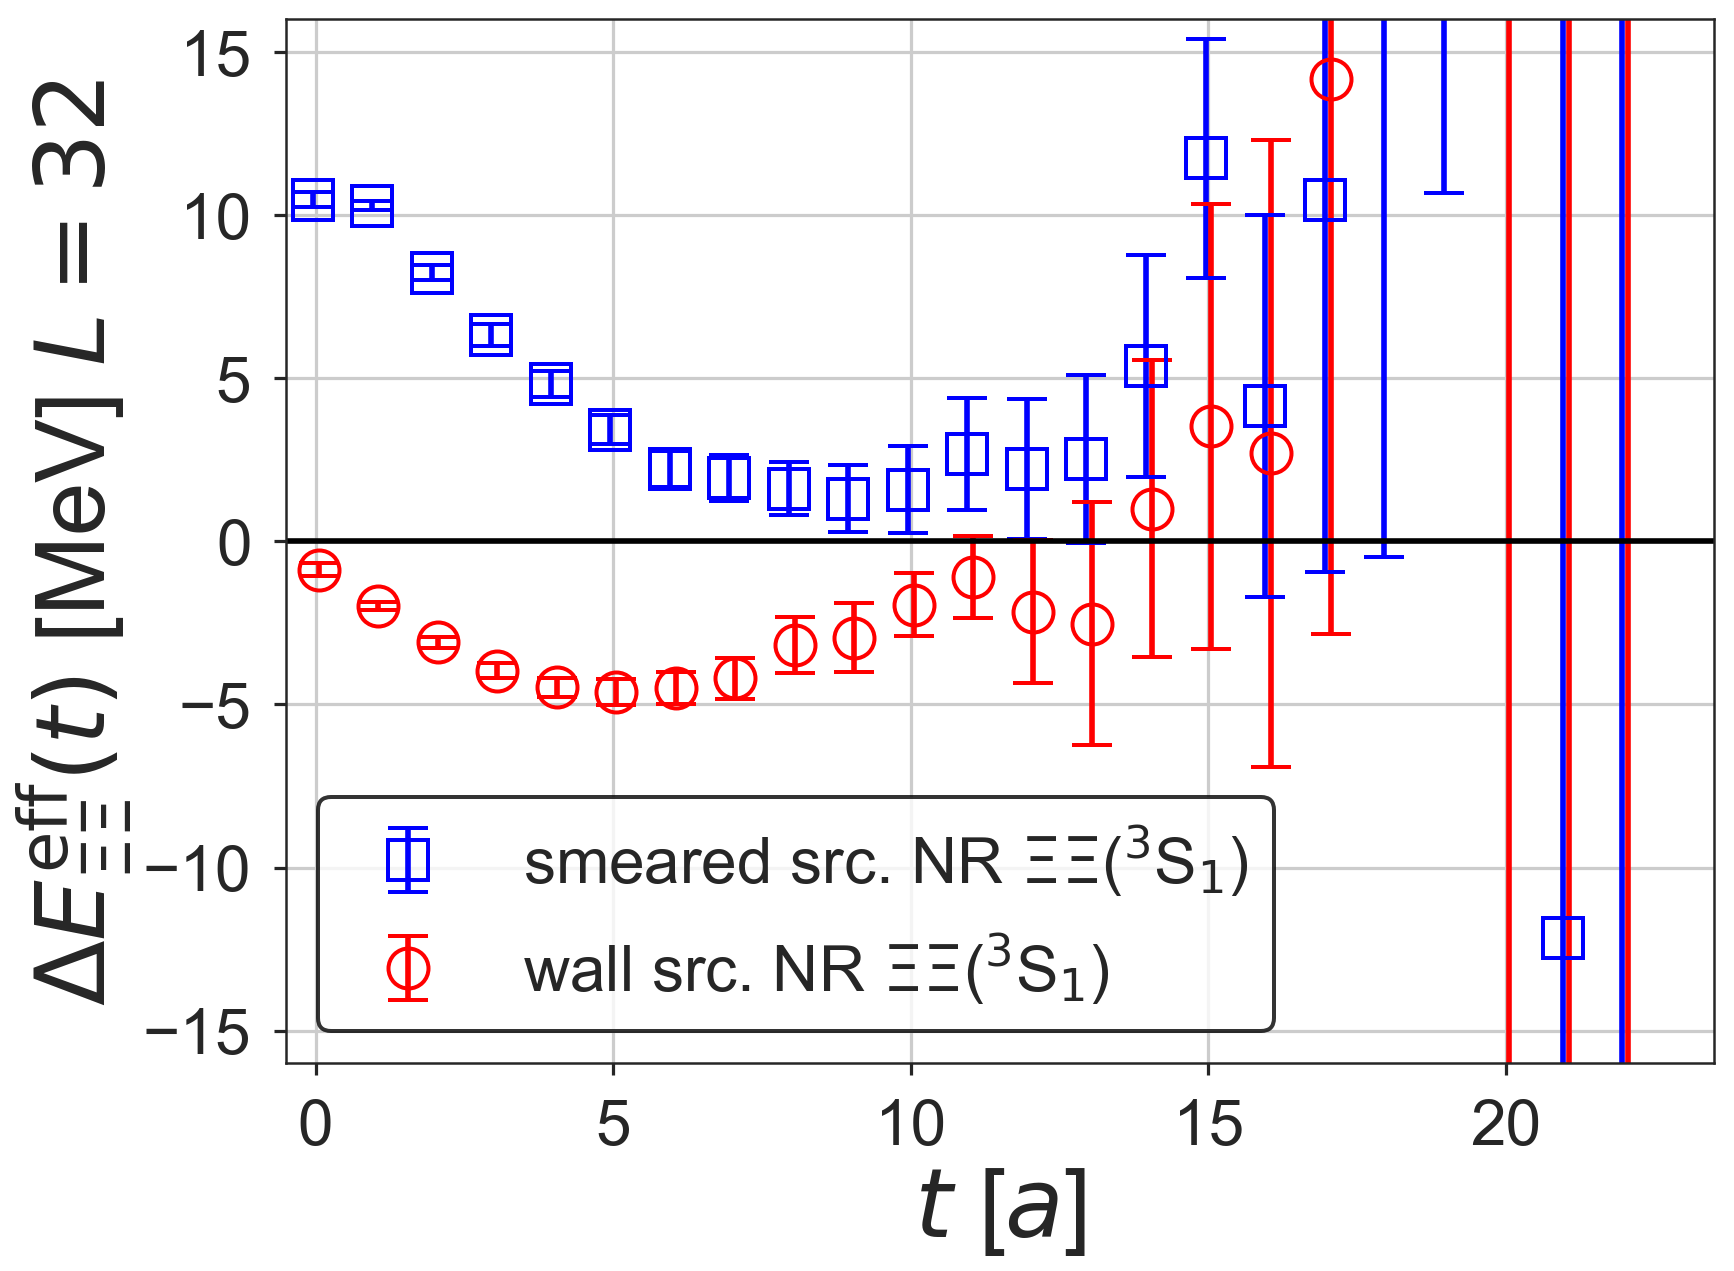

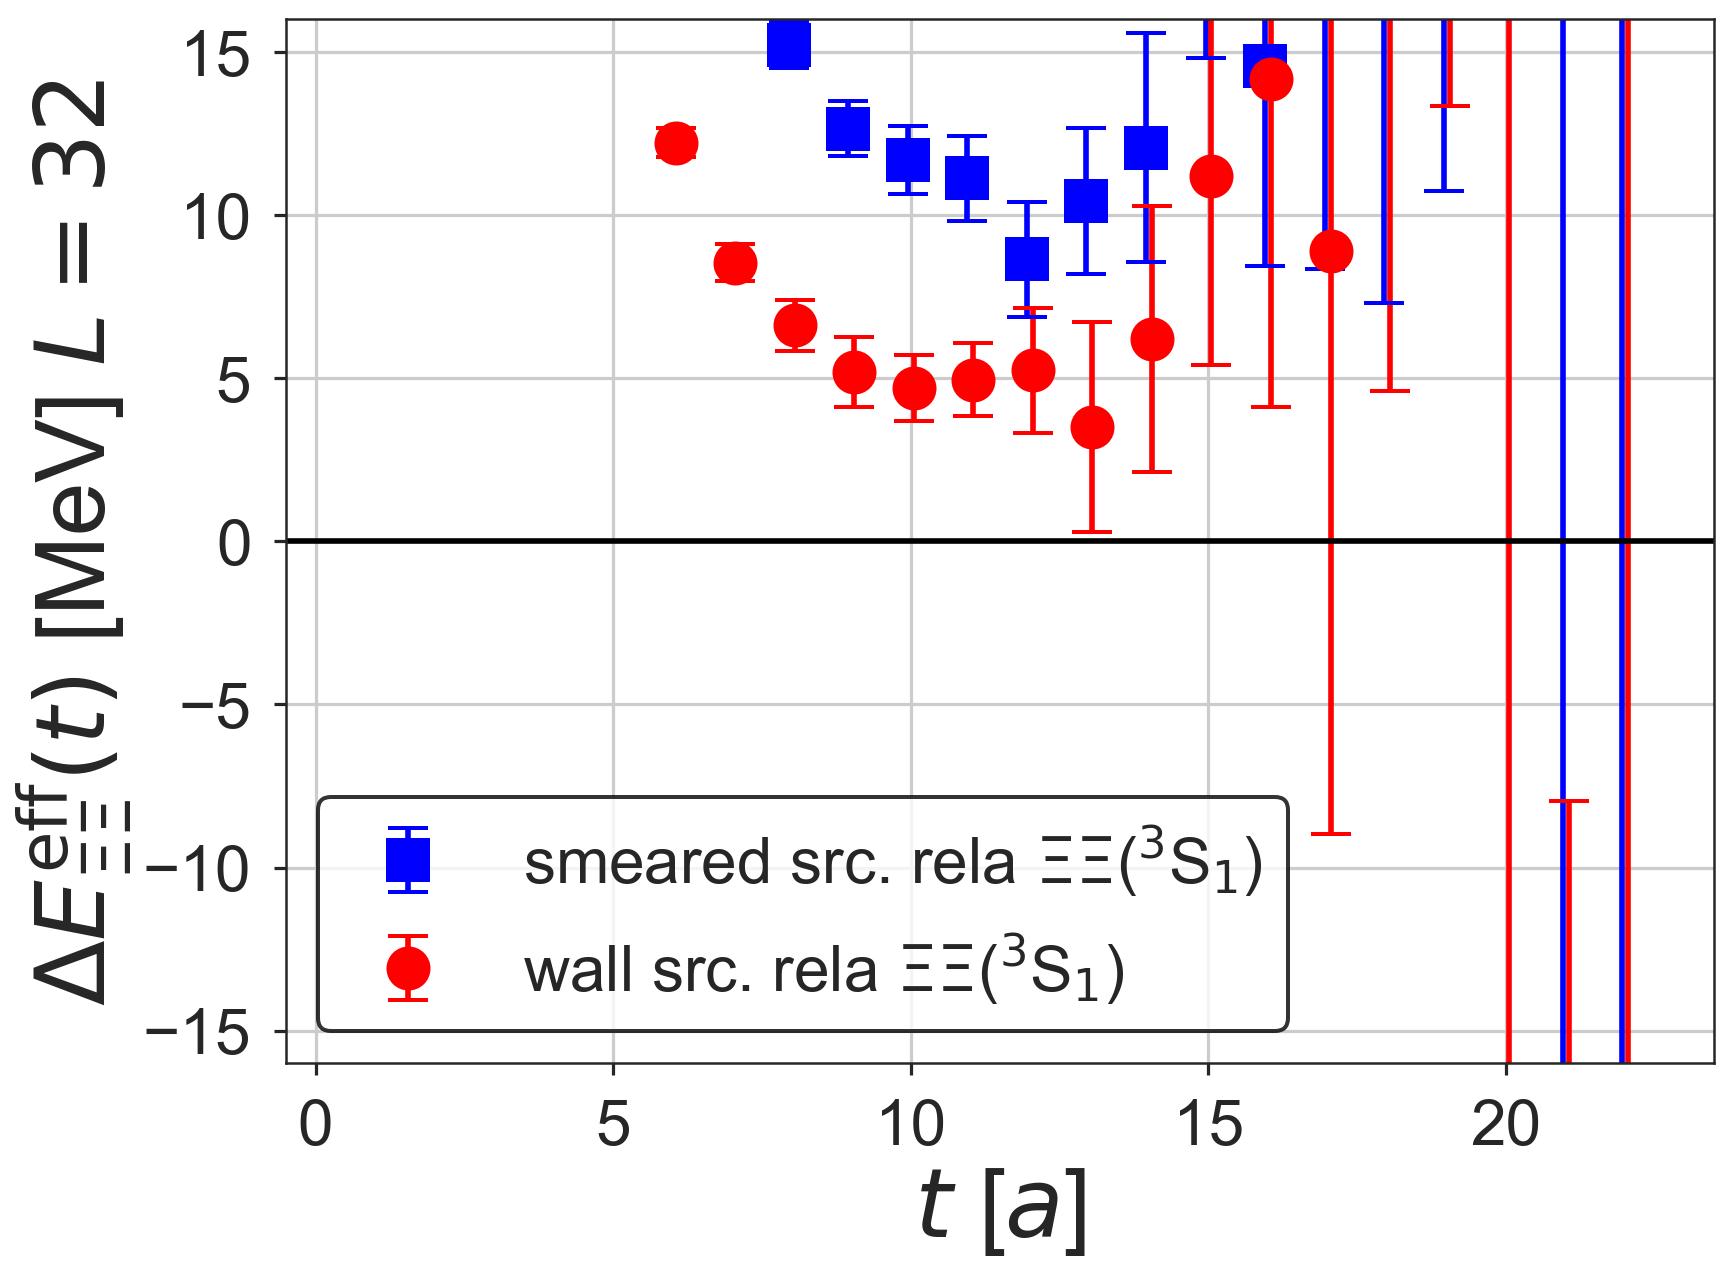

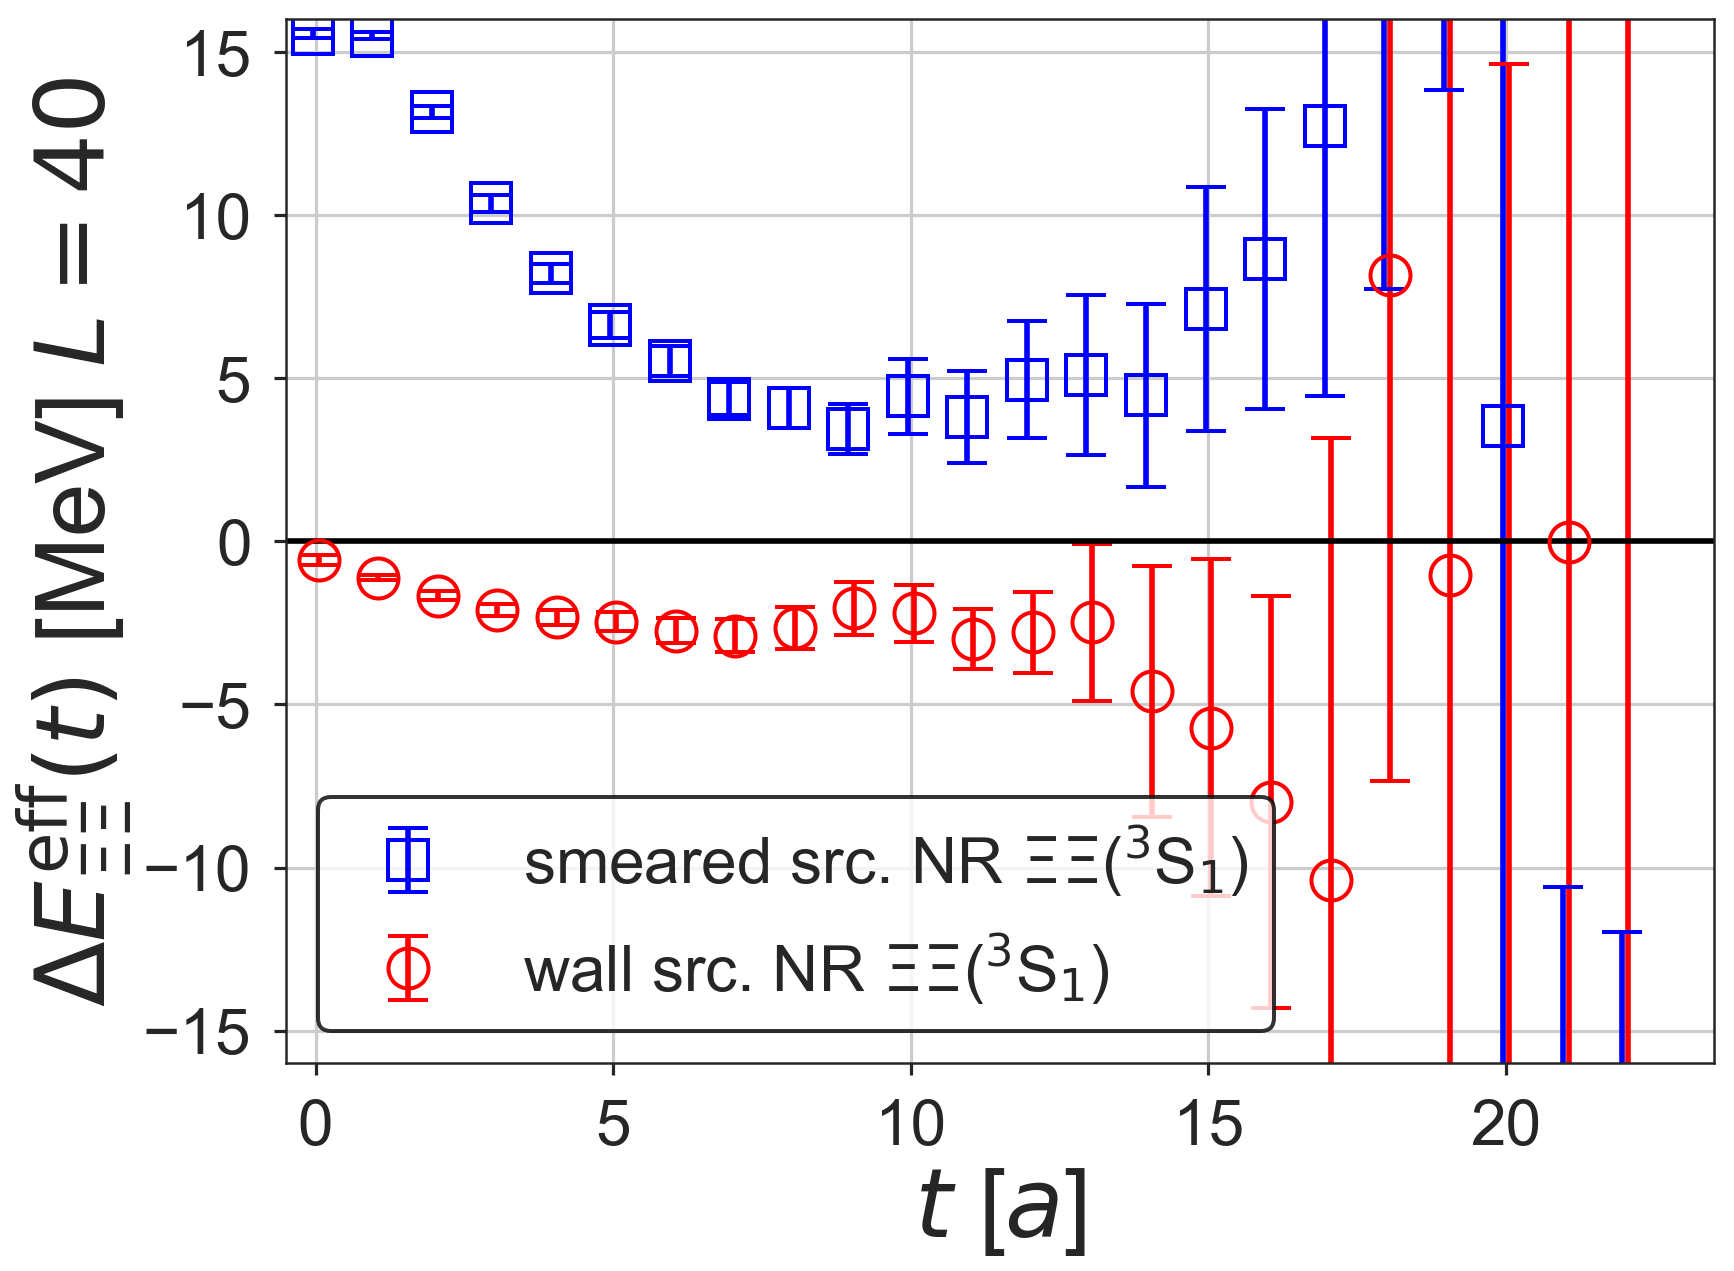

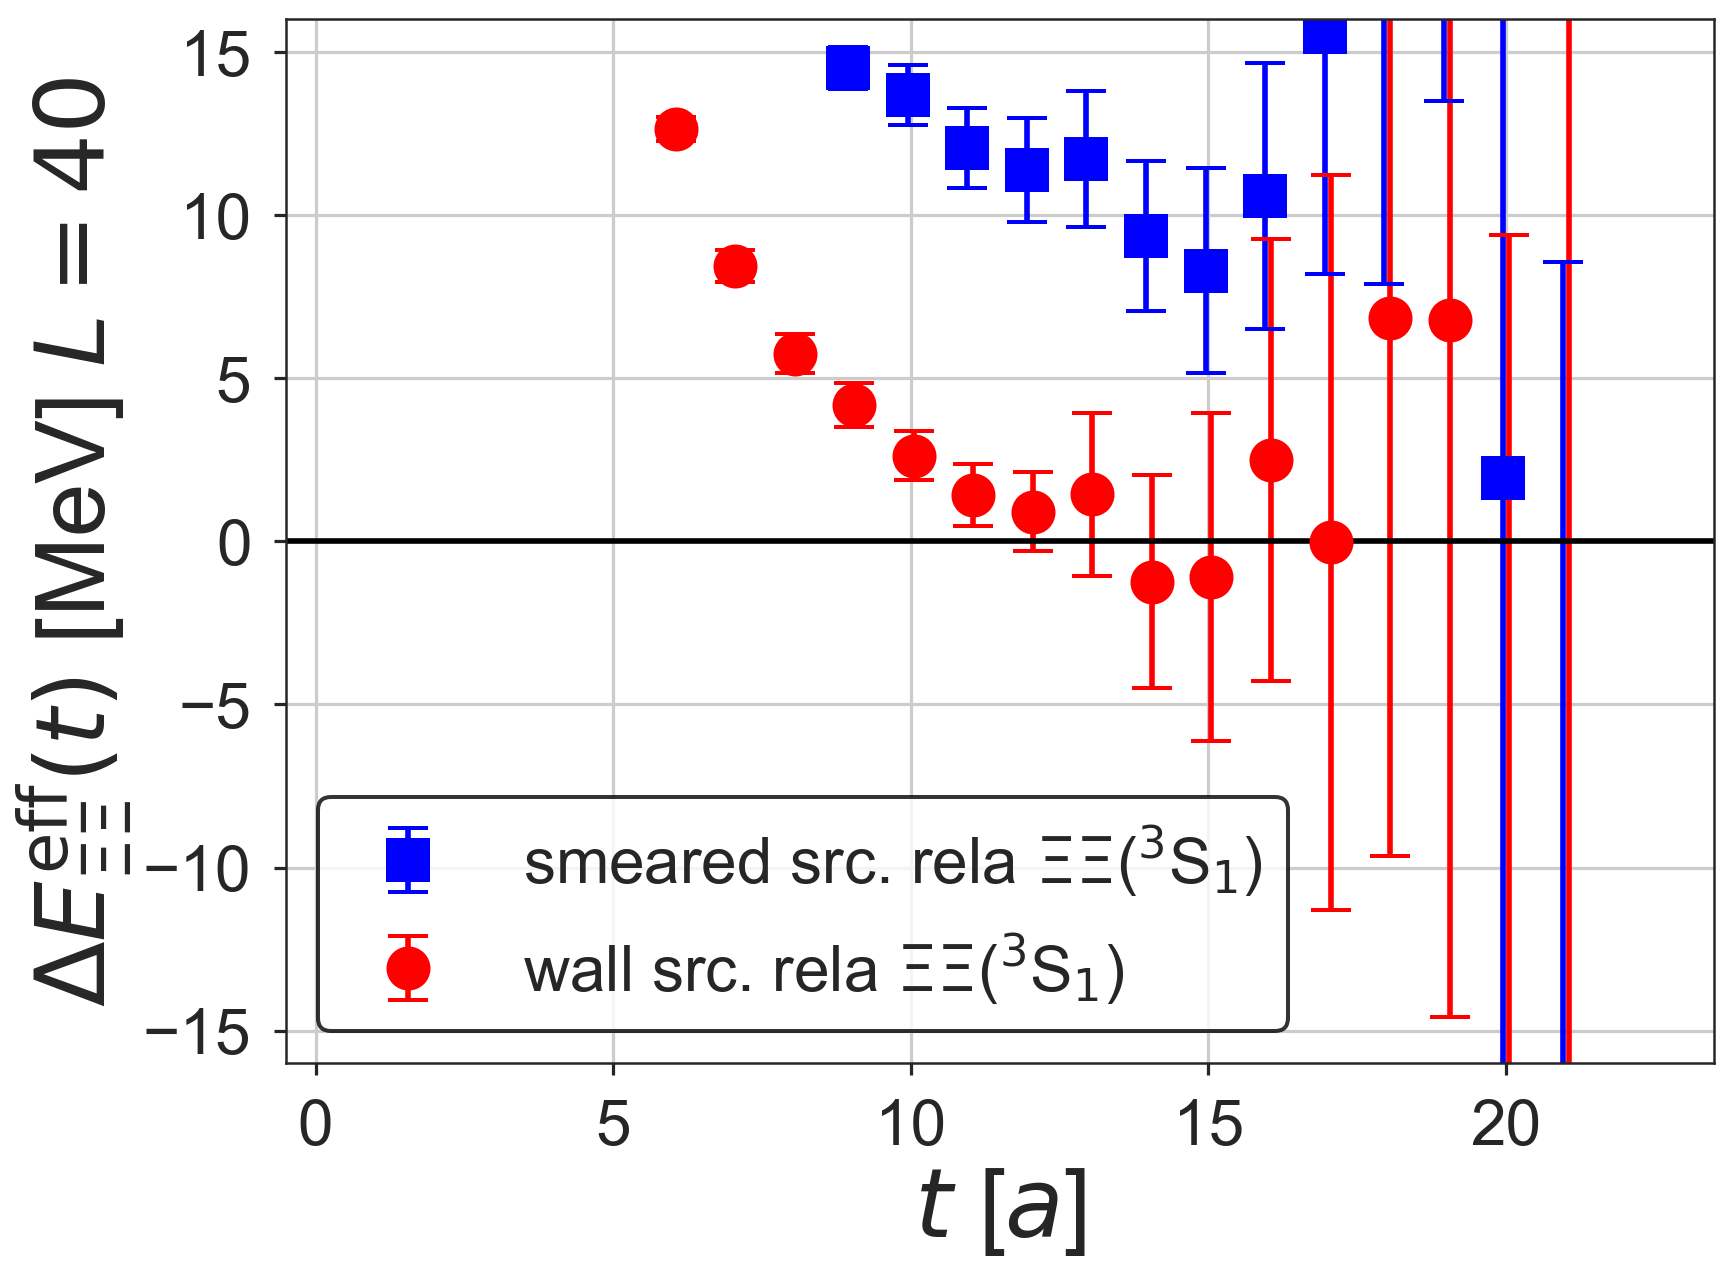

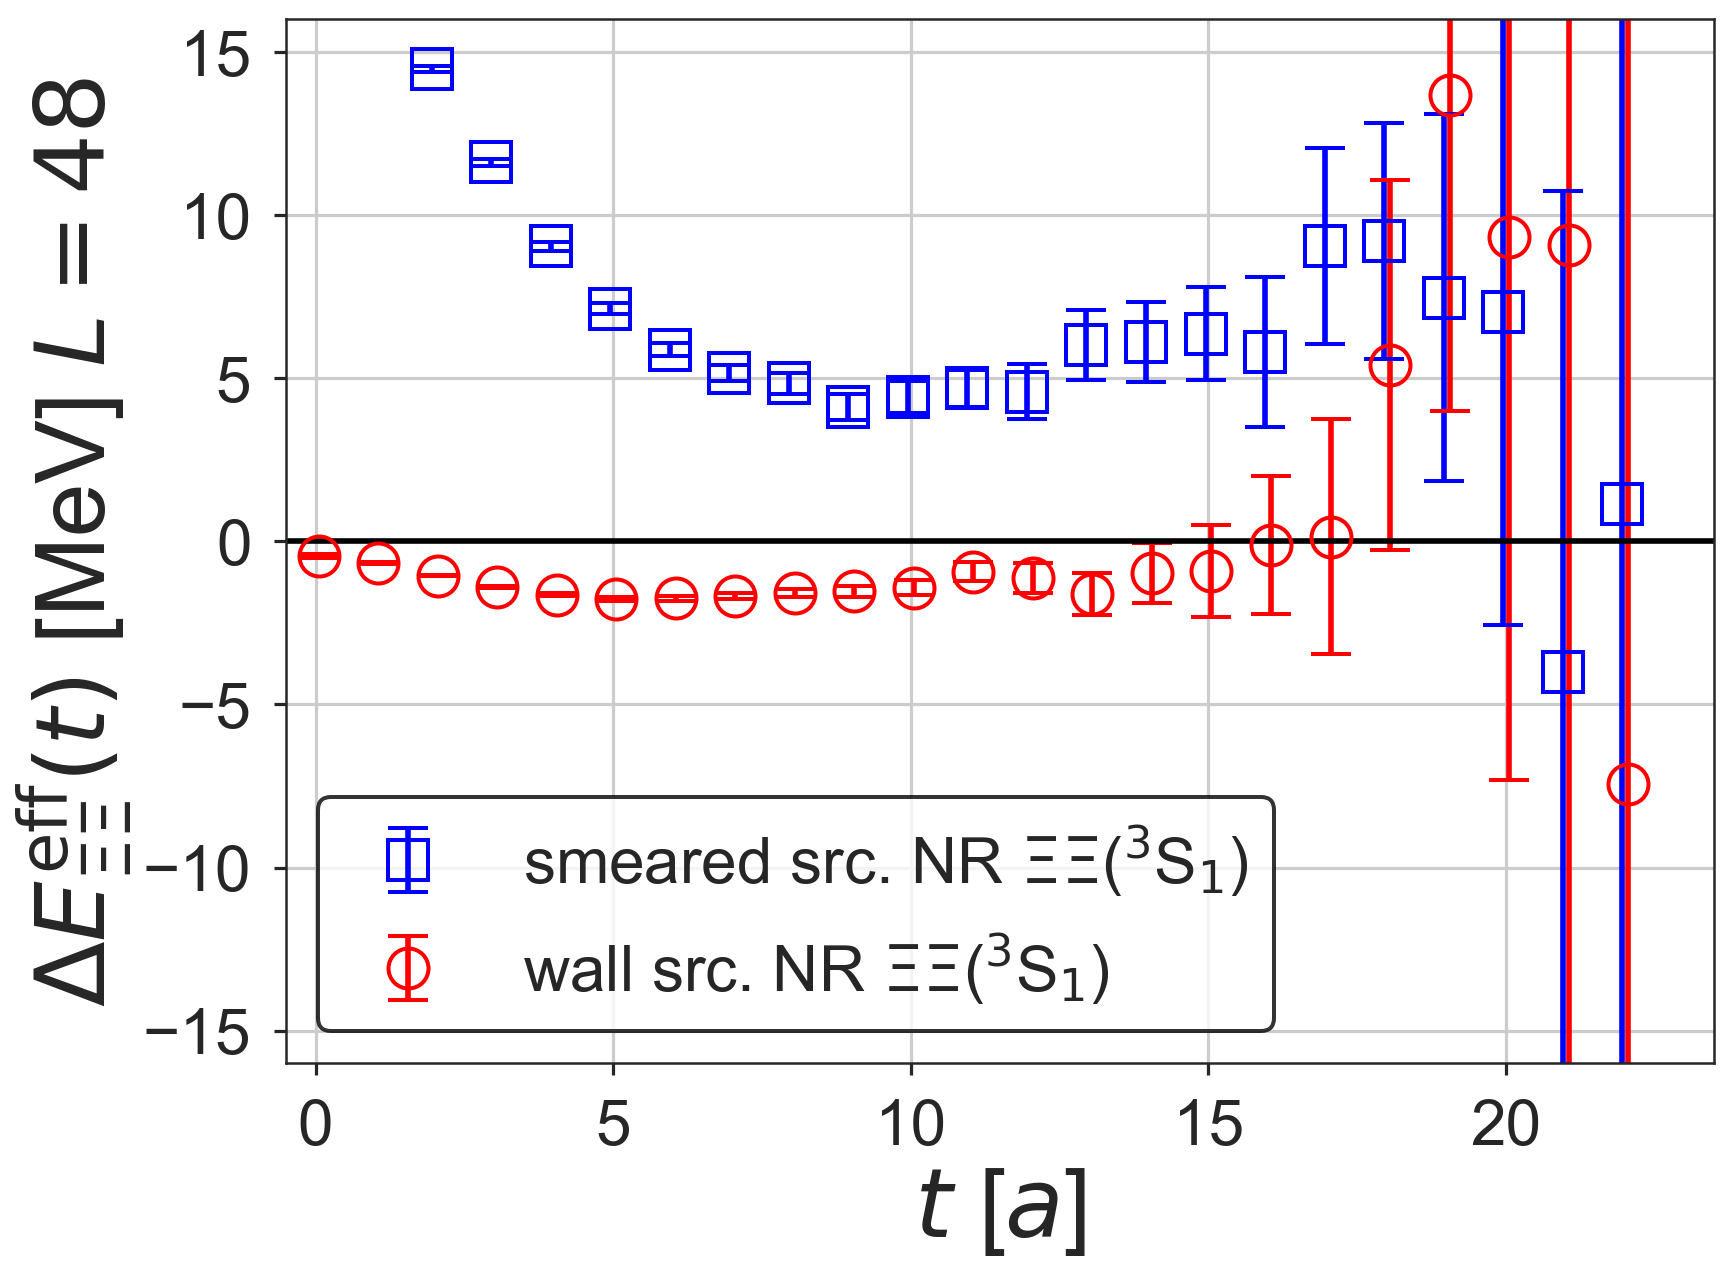

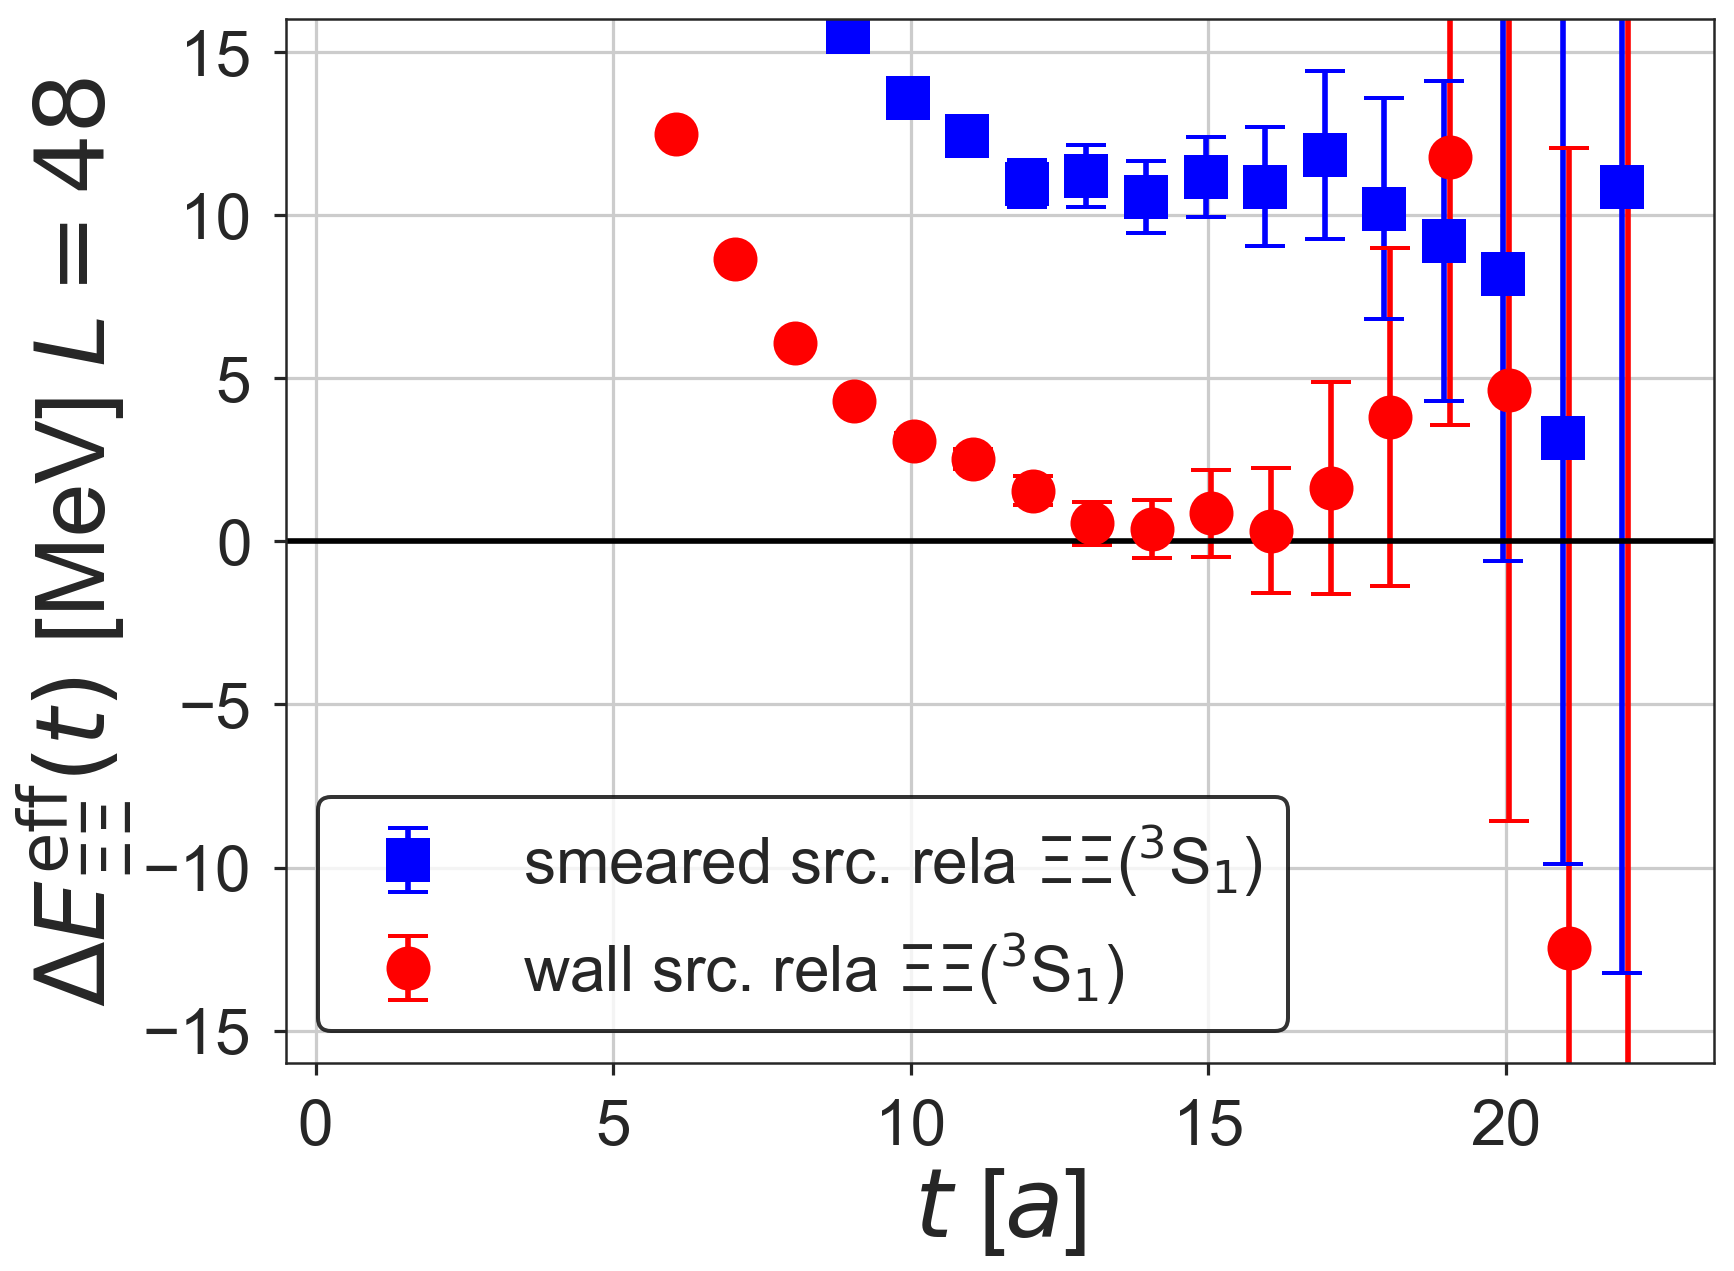

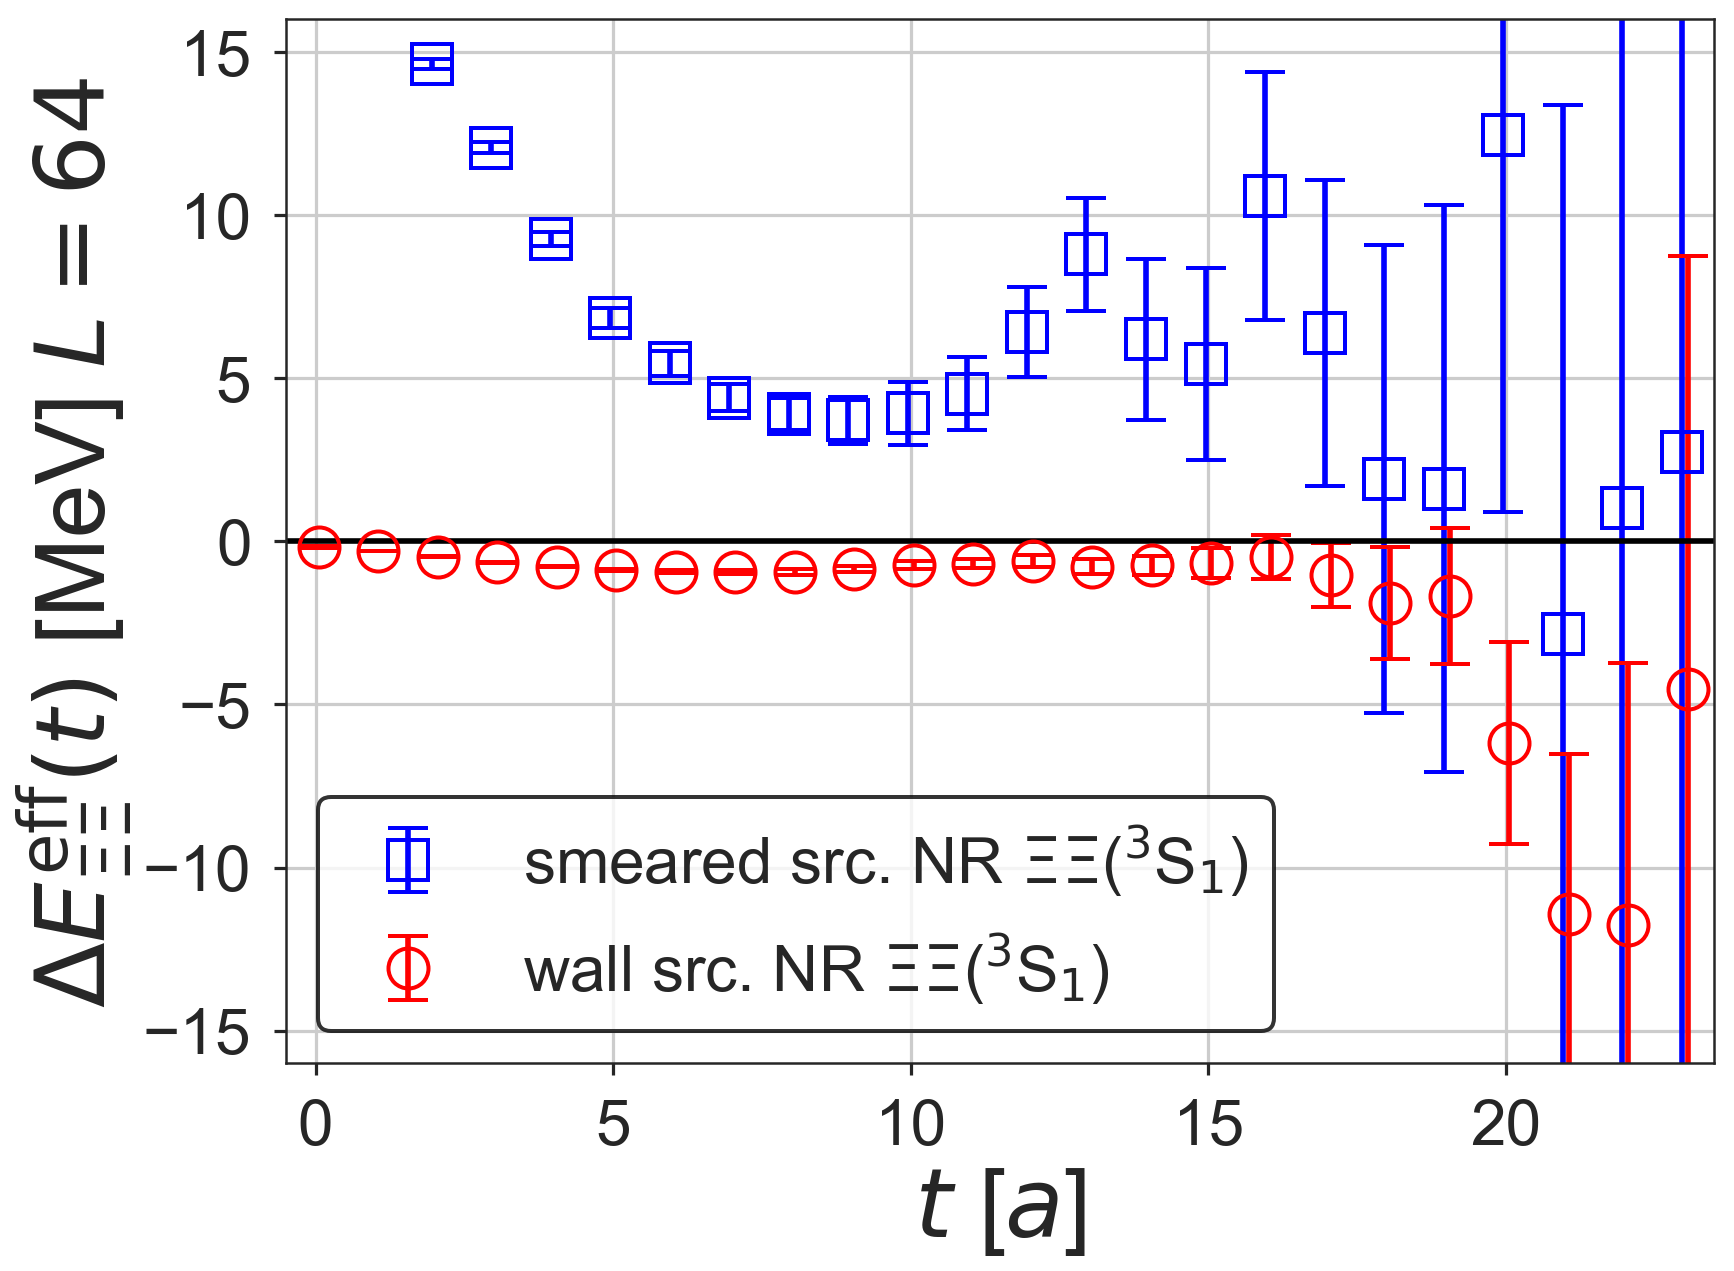

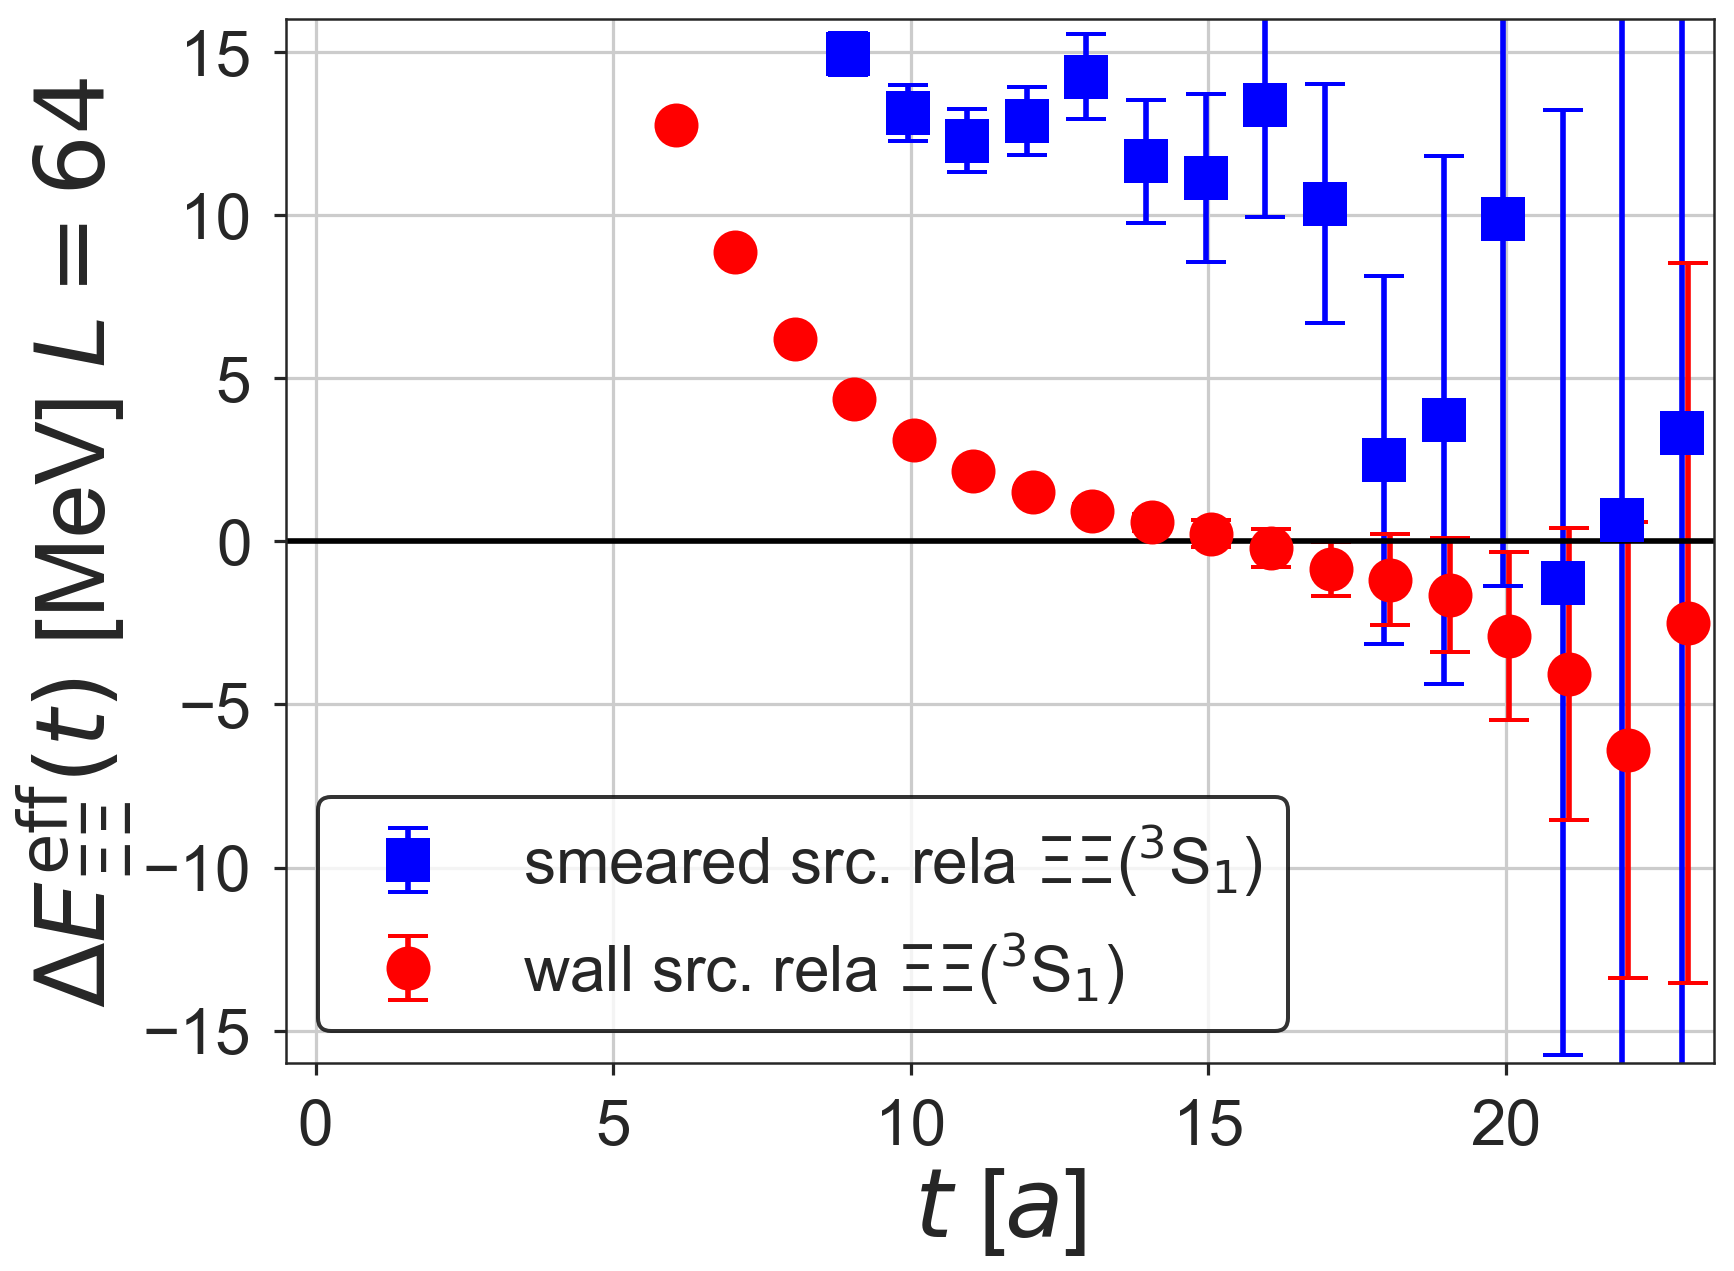

In [19]:
ch = 'XiXi'
spin = '3S1'
yr = (-16, 16)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)

In [ ]:
ch = 'NN'
spin = '1S0'
yr = (-21, 11)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)

In [ ]:
ch = 'NN'
spin = '3S1'
yr = (-21, 11)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)

In [ ]:
ch = 'triton'
spin = ''
yr = (-85, 5)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)

In [ ]:
ch = 'helium'
spin = ''
yr = (-85, 5)
for L in [32, 40, 48, 64]:
    for rela in ['NR', 'rela']:
        plot_dEeffs(ch=ch, spin=spin, L=L, rela=rela, yr=yr)